In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.io
import os

In [94]:
def load_pn_system( filename ):
    print("loading PN solution from {}".format(filename))
    data = scipy.io.loadmat(filename)
   
    result = {}
    if "id" in data:
        result["id"] = data["id"]
    else:
        result["id"] = "checkerboard"
    if "sigma_t" in data:
        result["sigma_t"] = data["sigma_t"]
    if "sigma_a" in data:
        result["sigma_a"] = data["sigma_a"]
    if "sigma_s" in data:
        result["sigma_s"] = data["sigma_s"]
    if "q00" in data:
        result["q00"] = data["q00"]
    if "x" in data:
        result["x"] = data["x"]
    if "b" in data:
        result["b"] = data["b"]
    if "A" in data:
        result["A"] = data["A"]
    if "info" in data:
        info = data["info"]
        result["order"] = info["order"][0][0][0][0]
        result["numCoeffs"] = info["numCoeffs"][0][0][0][0]
        result["resolution"] = np.array(info["resolution"][0][0][0])
    else:
        result["order"] = 1
        result["numCoeffs"] = 3
        result["resolution"] = np.array([70, 70])
        
    print("\torder={}  numCoeffs={}  resolution={} {}".format(result["order"], result["numCoeffs"], result["resolution"][0], result["resolution"][1]))
        
    return result


def extract_coefficient_field( x, res, numCoeffs, coeff = 0 ):
    # coeff: the coefficient we want to visualize
    res_x = res[0]
    res_y = res[1]
    
    u0 = np.zeros( (res_x, res_y) )
    for voxel_i in range(res_x):
        for voxel_j in range(res_y):
            i = (voxel_j*res_x + voxel_i)*numCoeffs + coeff
            value = x[i, 0]
            u0[voxel_i, voxel_j] = np.real(value)

    return u0


def visualize_solution_vector( x, res, numCoeffs, coeff = 0 ):
    # coeff: the coefficient we want to visualize
    
    u0 = extract_coefficient_field(x, res, numCoeffs, coeff)
   

    #u0 = np.abs(u0)
    #u0 = -u0
    u0 = np.clip(u0,1.0e-8, np.max(u0))

    vmin = np.min(u0)
    vmax = np.max(u0)
    
    if vmin >= vmax:
        vmin = vmax
    
    #print("visualize_solution_vector: vmin={} vmax={}".format(vmin, vmax))

    if vmin==vmax or vmin < 0.0:
        img_view = plt.imshow(u0.T, interpolation="nearest", cmap='jet', vmin=vmin, vmax=vmax, origin='lower')
    else:
        img_view = plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
    return img_view

In [95]:
def visualize_problem( result ):
    print('problem parameters - {} ----------'.format(result["id"]))
    fig = plt.figure(figsize=(15, 15));

    ax = plt.subplot(141)
    plt.title('sigma_t')
    img_view = plt.imshow(result["sigma_t"].T, interpolation="nearest", cmap='jet', origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot(142)
    plt.title('sigma_s')
    img_view = plt.imshow(result["sigma_s"].T, interpolation="nearest", cmap='jet', origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot(143)
    plt.title('sigma_a')
    img_view = plt.imshow(result["sigma_a"].T, interpolation="nearest", cmap='jet', origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot(144)
    plt.title('q00')
    img_view = plt.imshow(result["q00"].T, interpolation="nearest", cmap='jet', origin='lower')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    plt.show()

def visualize_test( result, coeff=0, title="" ):
    res = result["resolution"]
    numCoeffs = result["numCoeffs"]

    print('{}'.format(title))
    fig = plt.figure(figsize=(15, 15));

    ax = plt.subplot(131)
    plt.title('clip(x)')
    img_view = visualize_solution_vector( result["x"], res, numCoeffs, coeff )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot(132)
    plt.title('clip(-x)')
    img_view = visualize_solution_vector( -result["x"], res, numCoeffs, coeff )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)

    ax = plt.subplot(133)
    plt.title('abs(x)')
    img_view = visualize_solution_vector( np.abs(result["x"]), res, numCoeffs, coeff )
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(img_view, cax=cax)
    
    plt.show()


In [96]:
problem_id = "checkerboard"
path = "C:/projects/epfl/epfl17/python/pnsolver/results/studies"

# Standard checkerboard test (P1)

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


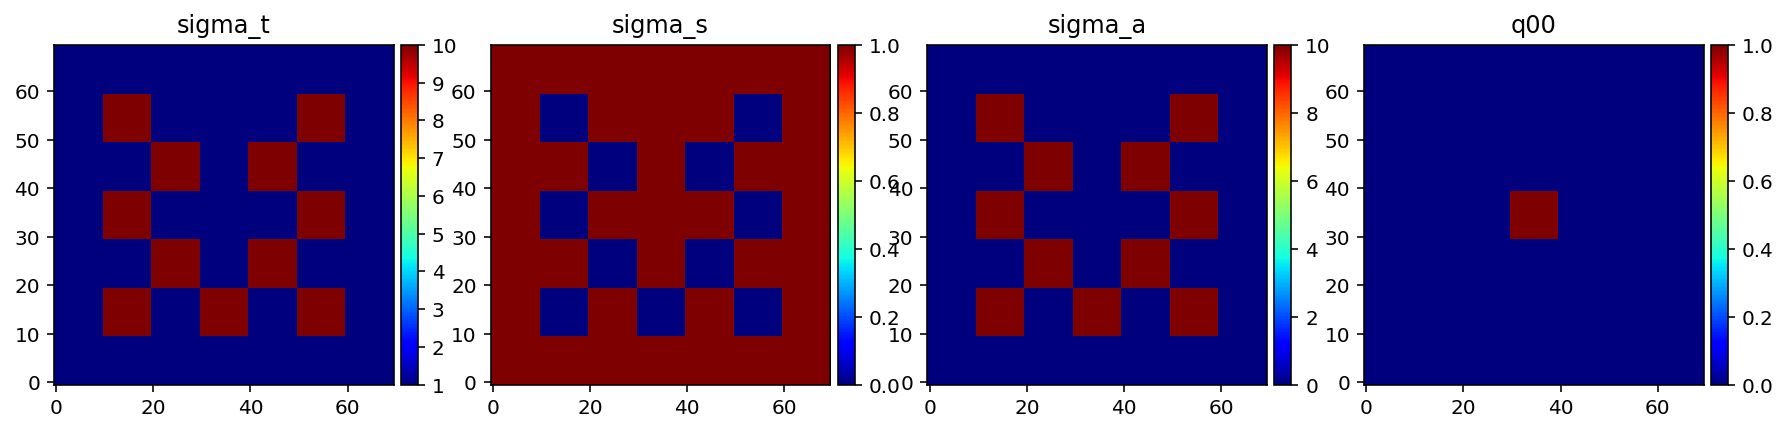

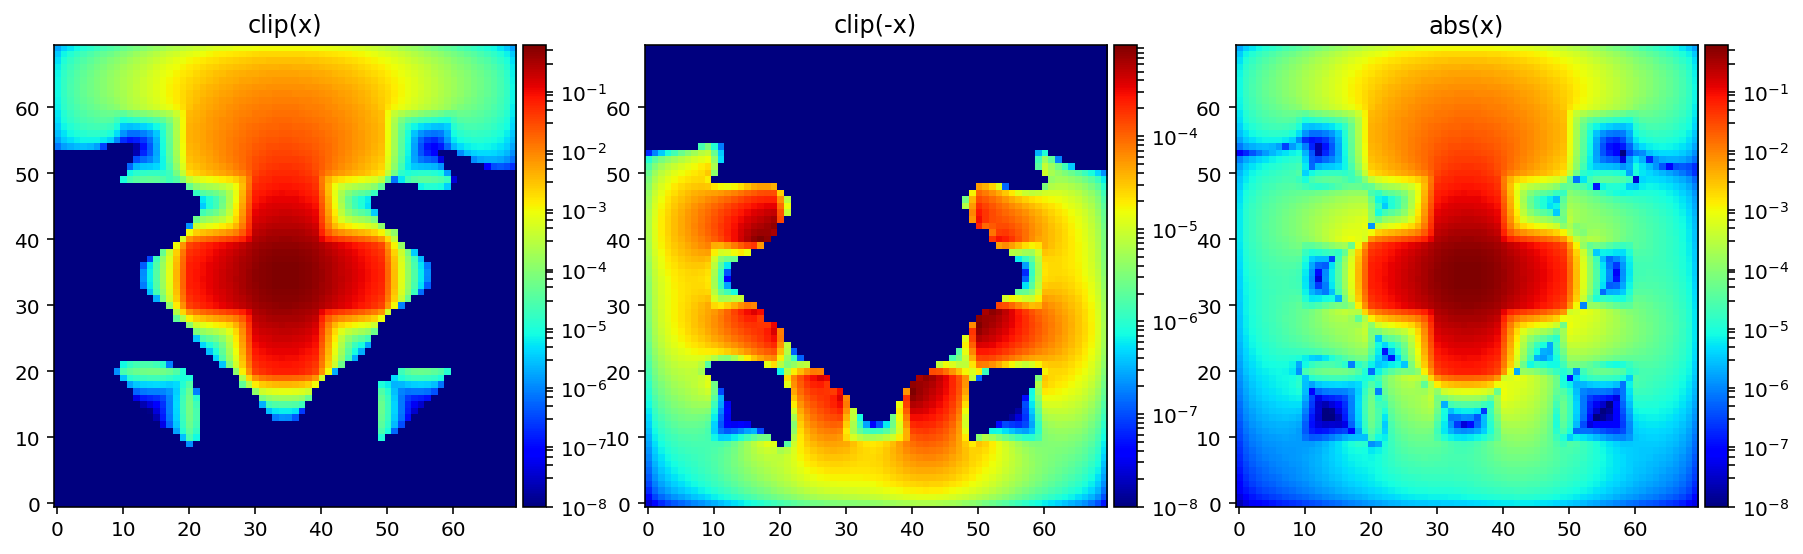

In [79]:
filename = "{}/{}.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_problem( result )
visualize_test( result )

# Higher order (P2)

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_p2.mat
	order=2  numCoeffs=6  resolution=70 70



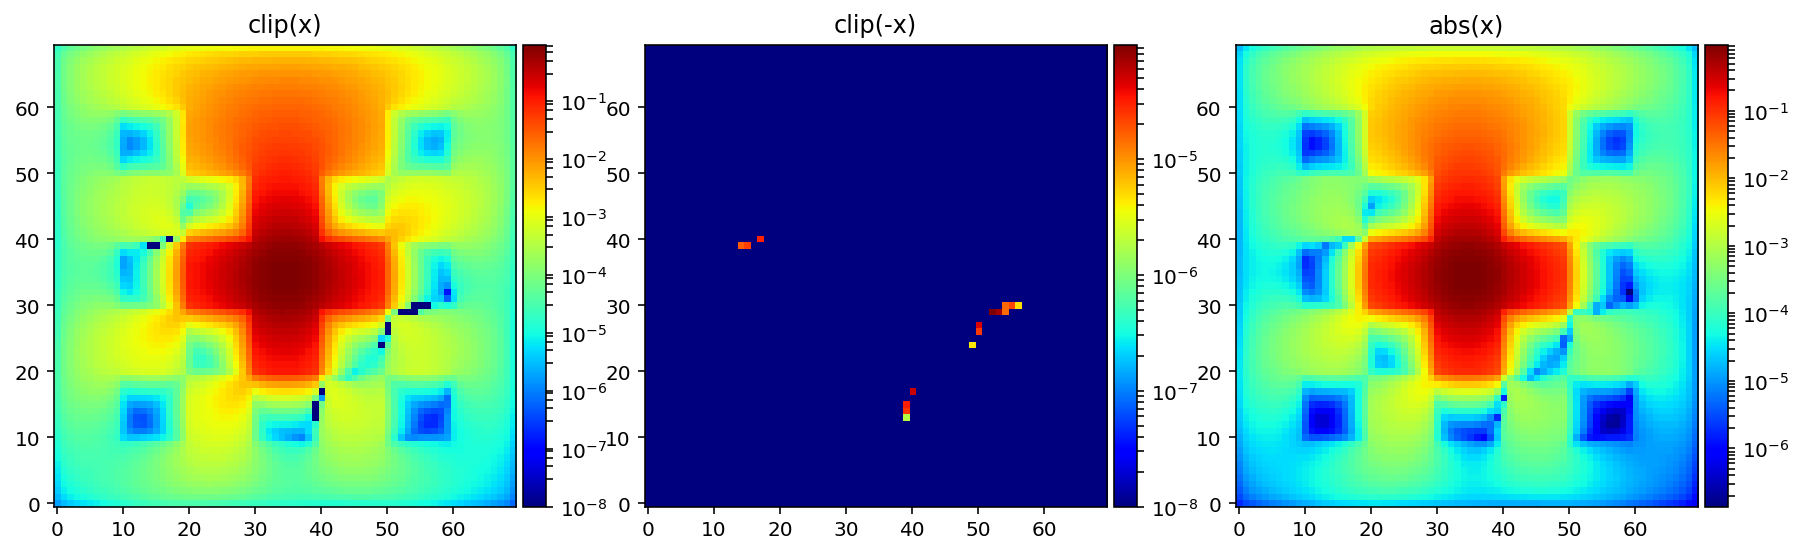

In [81]:
filename = "{}/{}_p2.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )

# Higher order (P3)

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_p3.mat
	order=3  numCoeffs=10  resolution=70 70



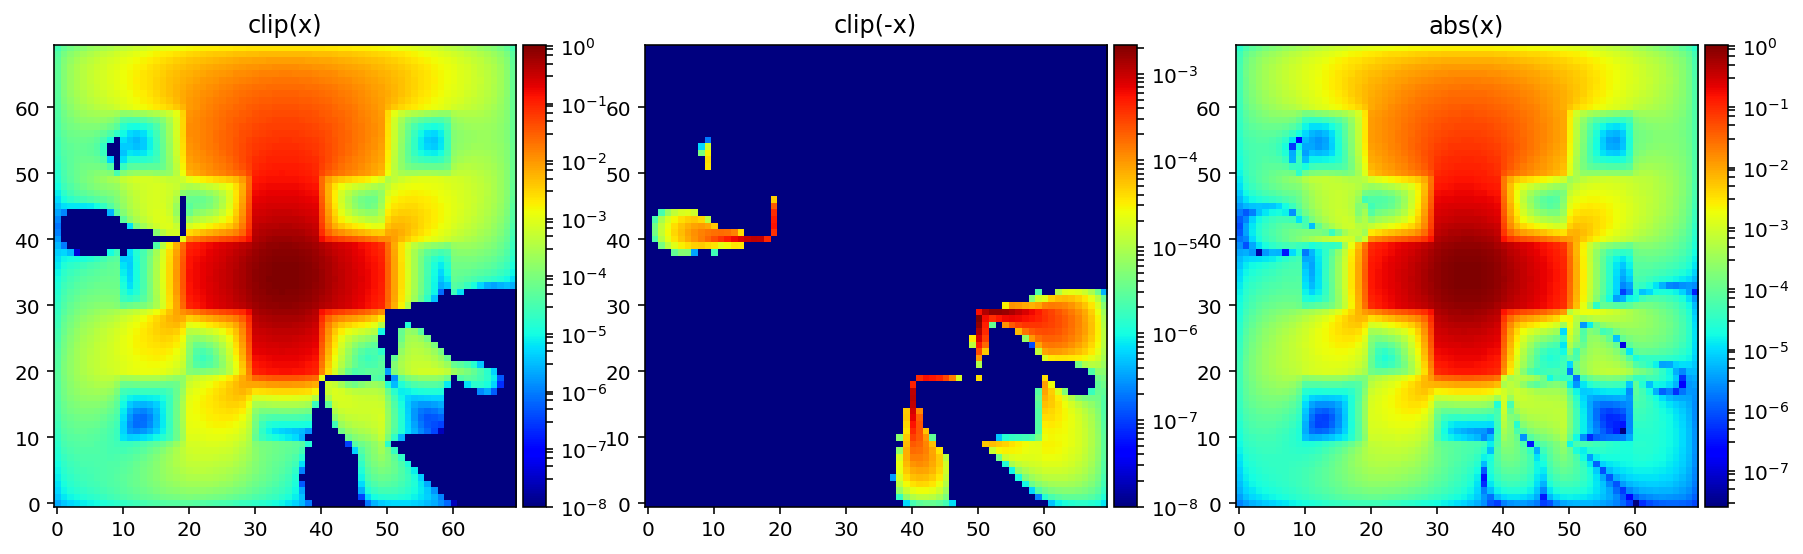

In [82]:
filename = "{}/{}_p3.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )

# All Vacuum

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_vacuum.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


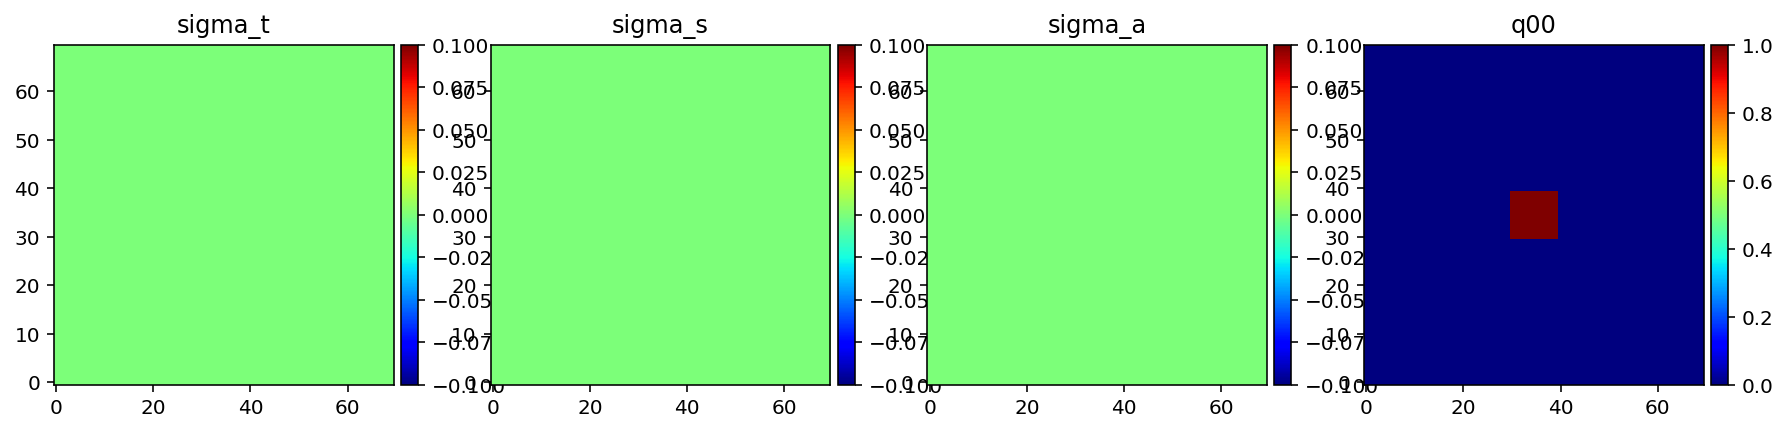

moment 0


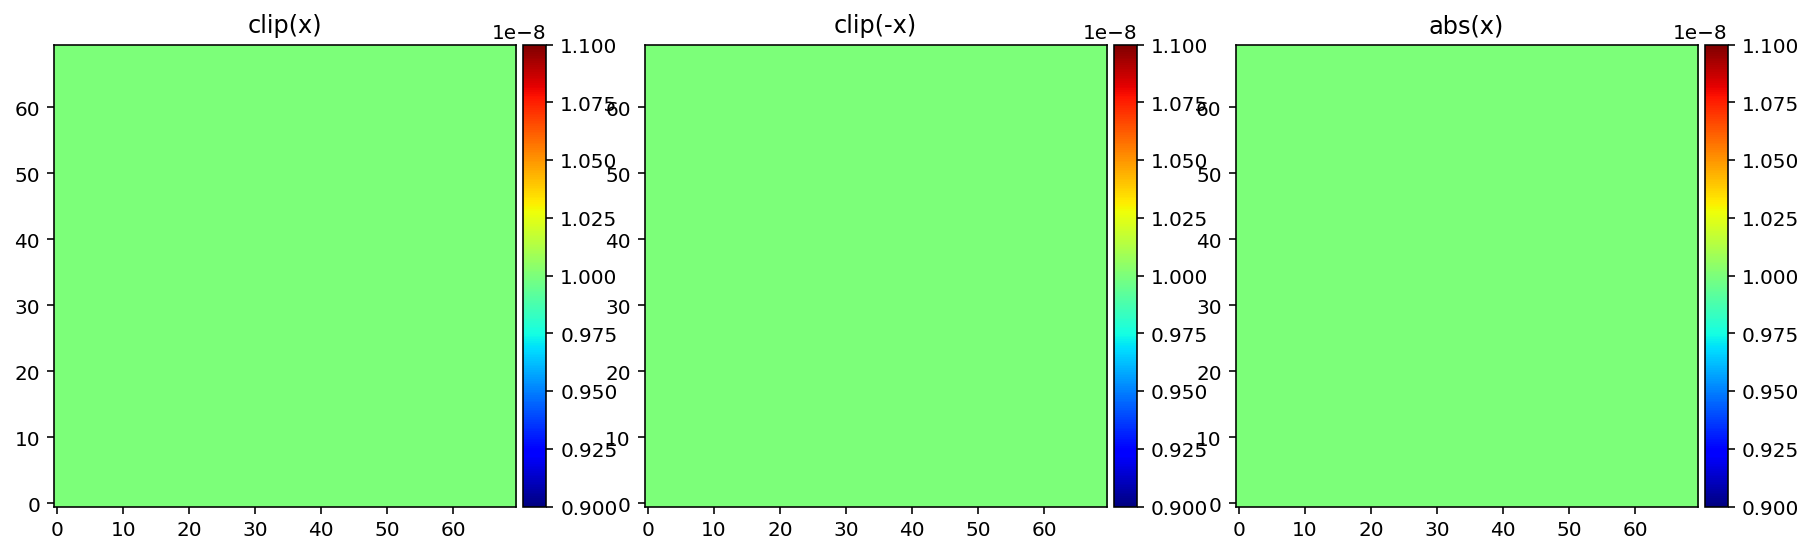

moment 1


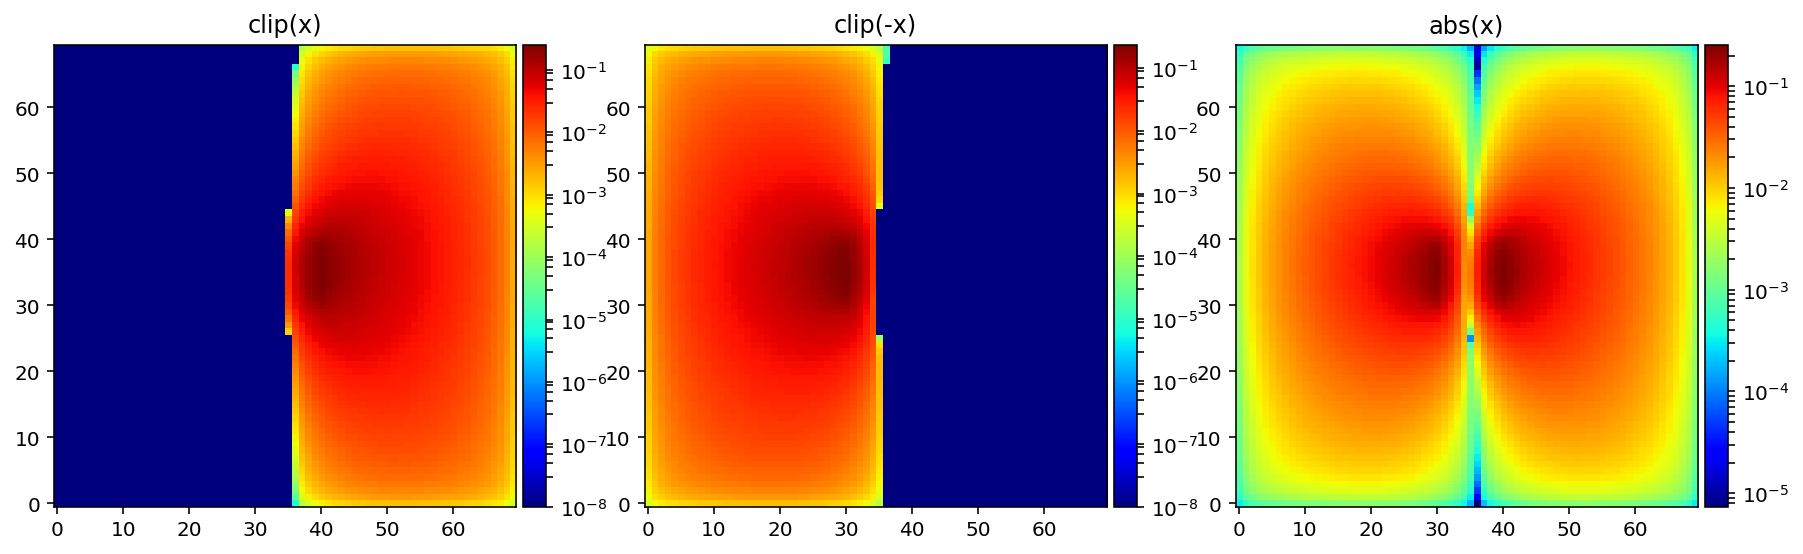

moment 2


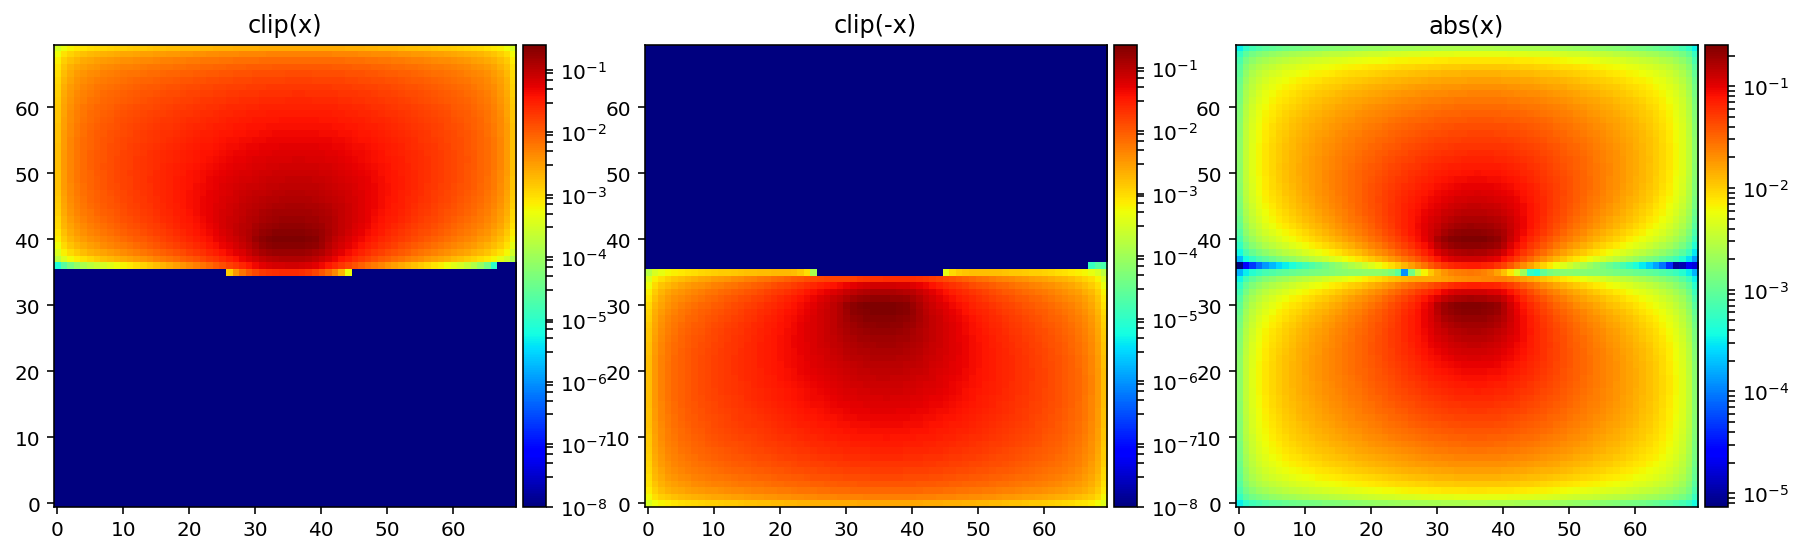

In [92]:
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_vacuum.mat"
result = load_pn_system( filename )
visualize_problem( result )
visualize_test( result, 0, "moment 0" )
visualize_test( result, 1, "moment 1" )
visualize_test( result, 2, "moment 2" )

# No scattering

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sigmas=0.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


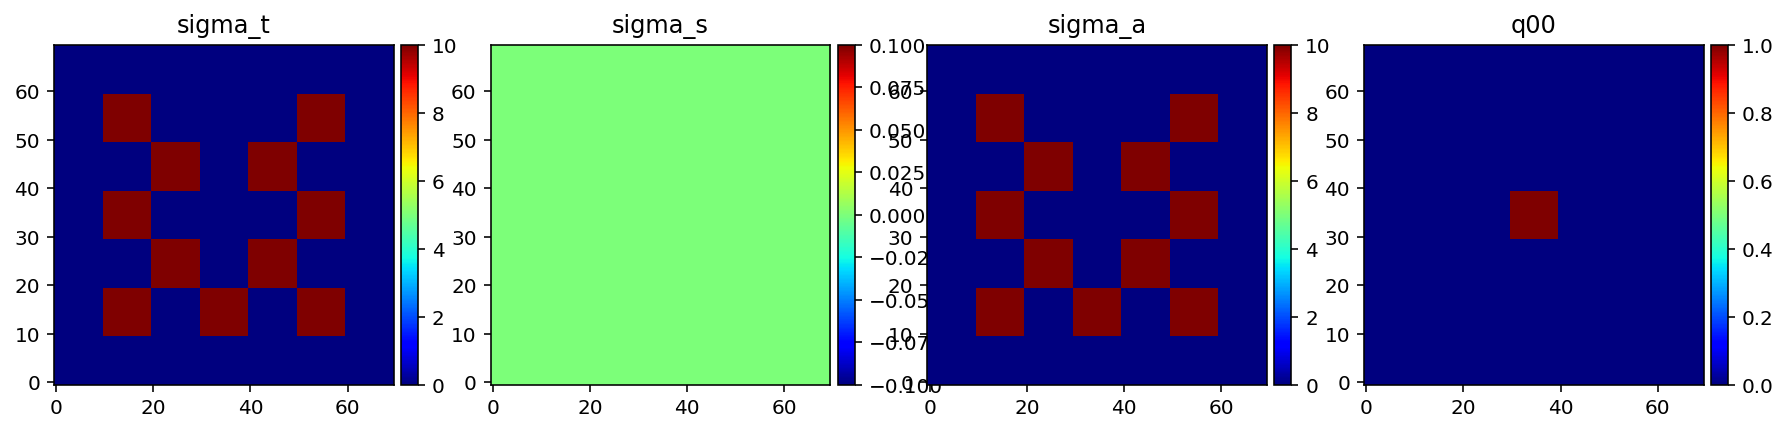

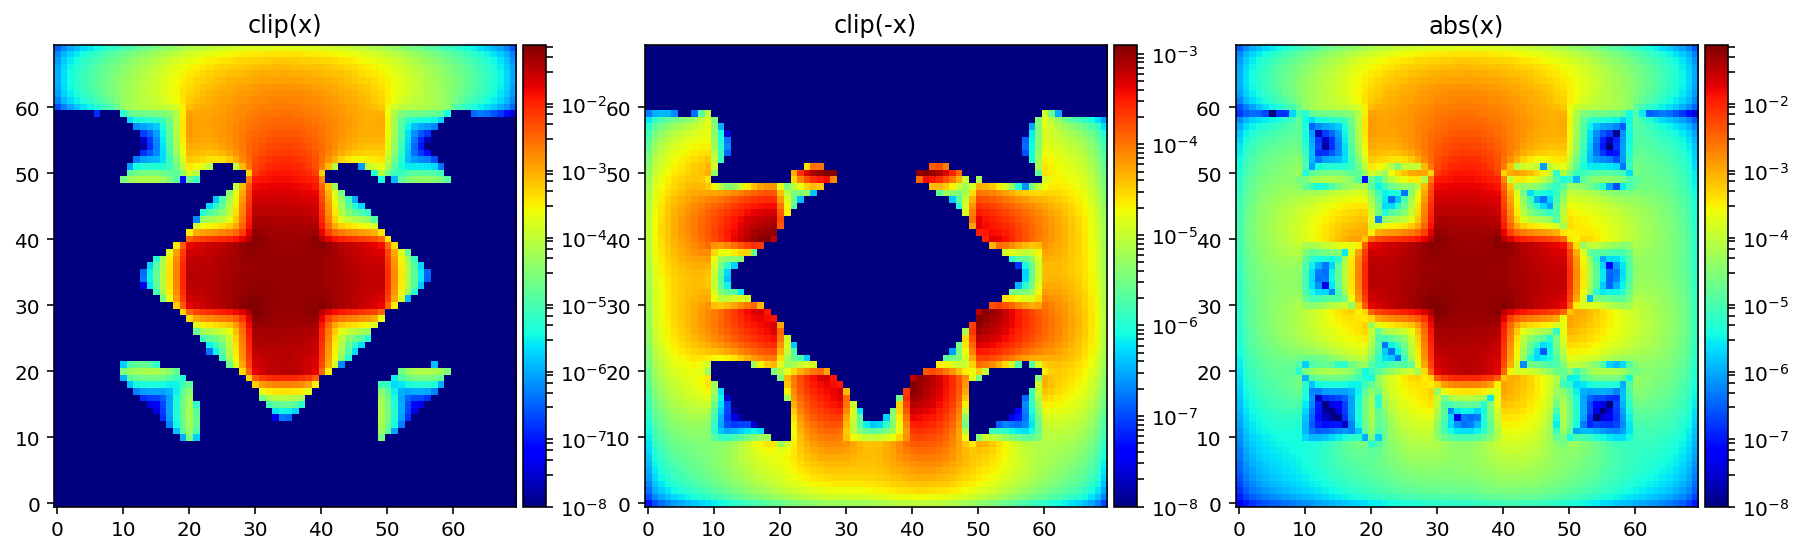

In [84]:
filename = "{}/{}_sigmas=0.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_problem( result )
visualize_test( result )

# Constant $\sigma_t$

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sigmat=const.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


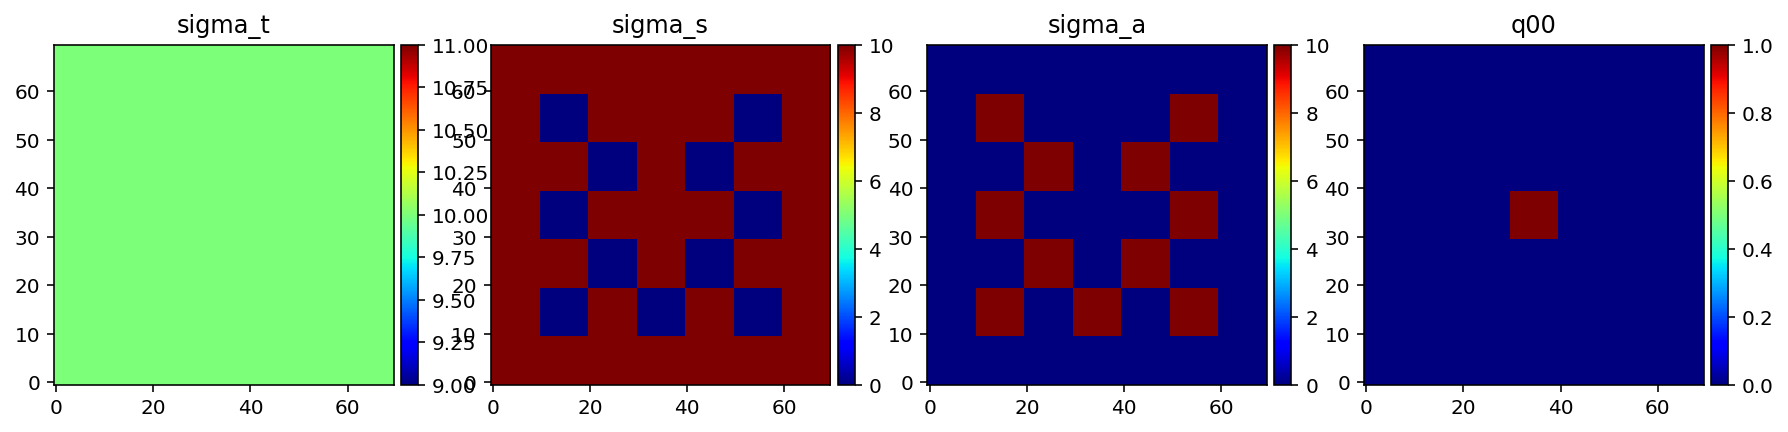

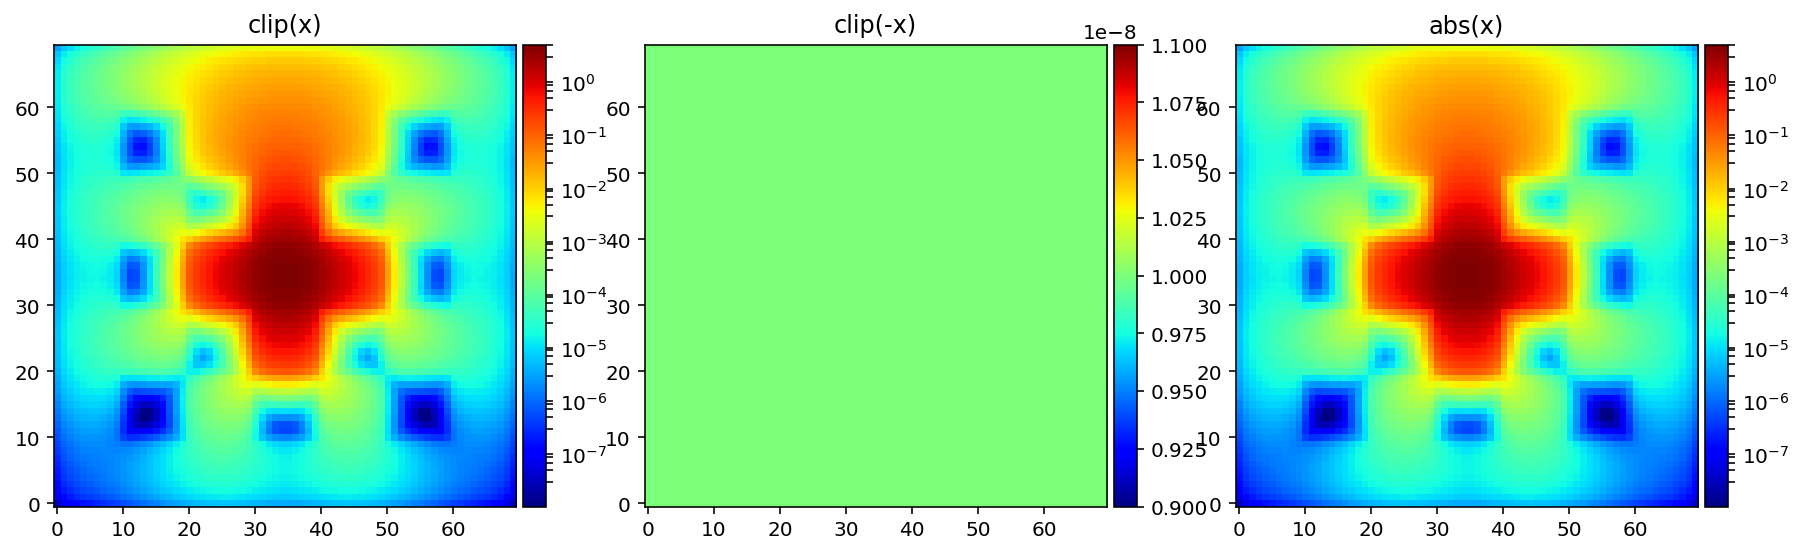

In [85]:
filename = "{}/{}_sigmat=const.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_problem( result )
visualize_test( result )

# Blurred $\sigma_t$

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_blur10.0.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


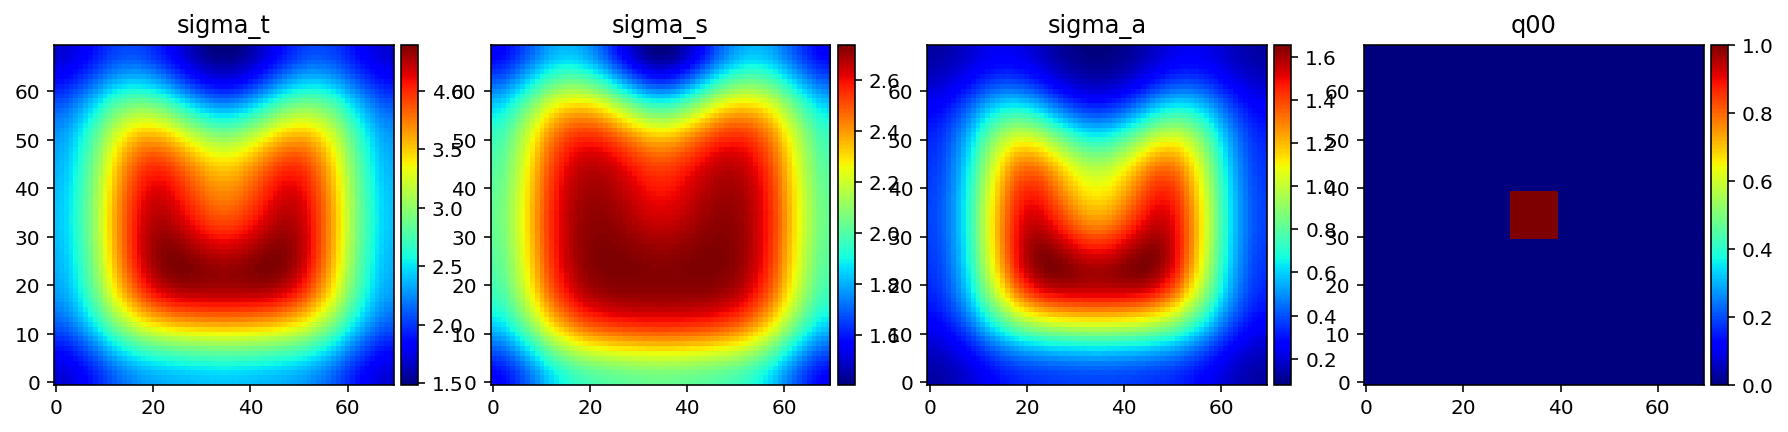

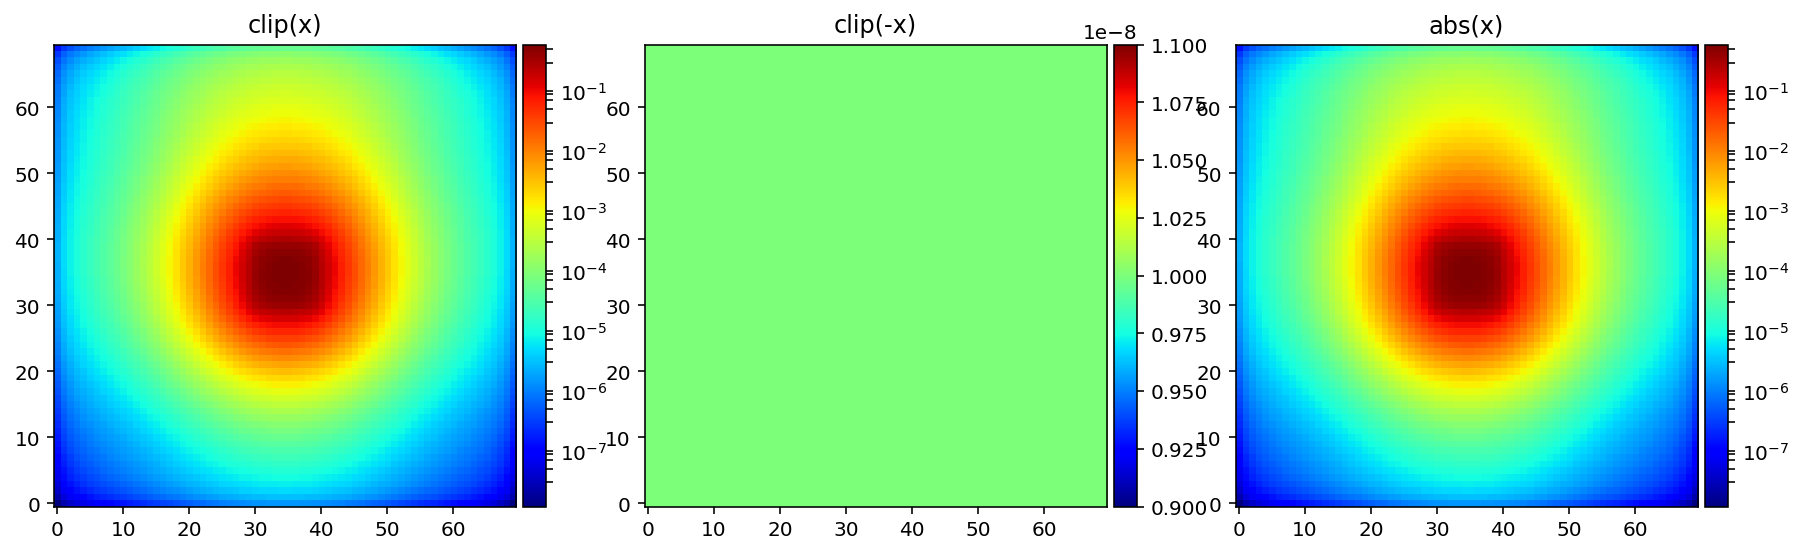

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_blur5.0.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


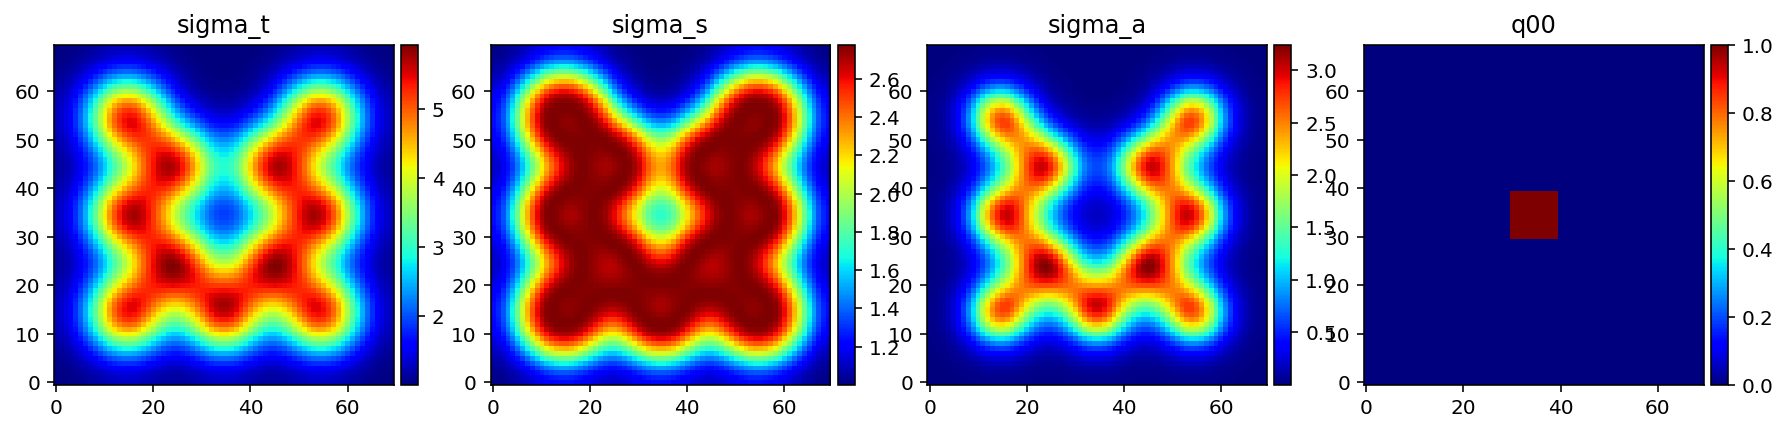

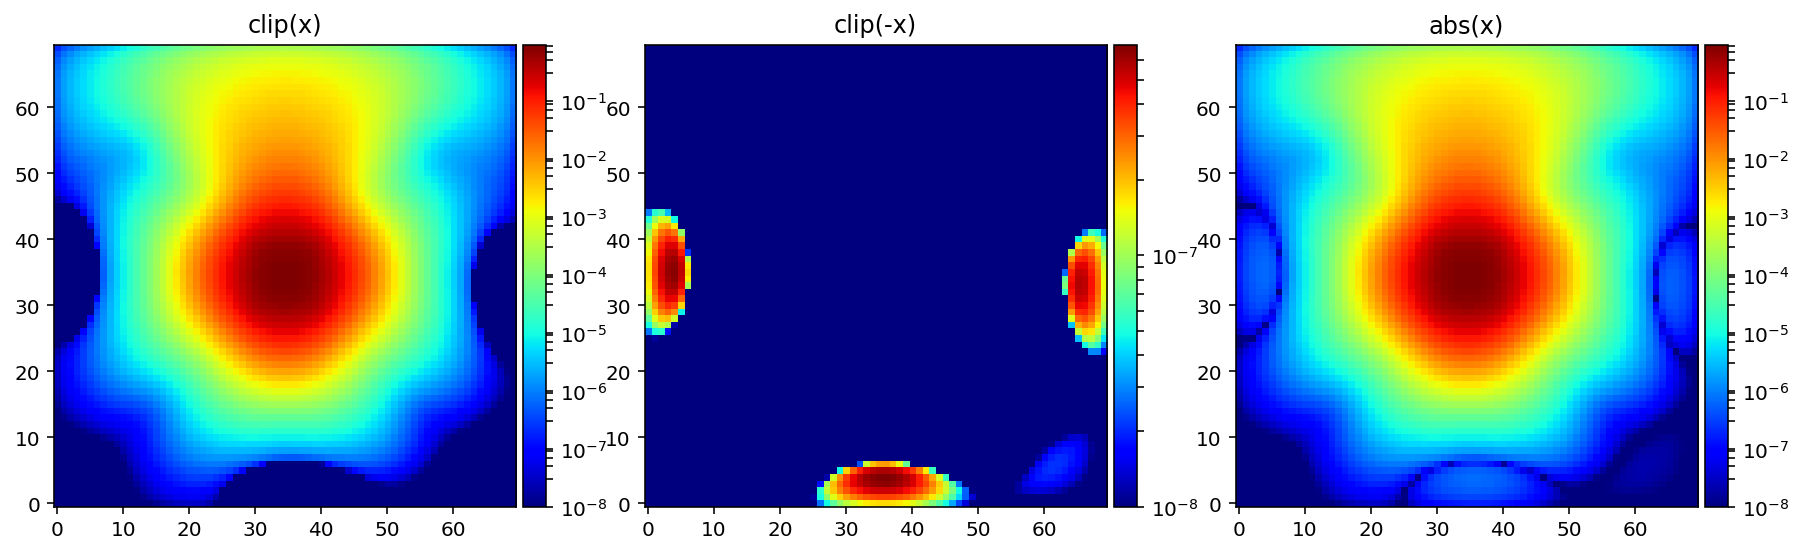

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_blur1.0.mat
	order=1  numCoeffs=3  resolution=70 70
problem parameters - checkerboard ----------


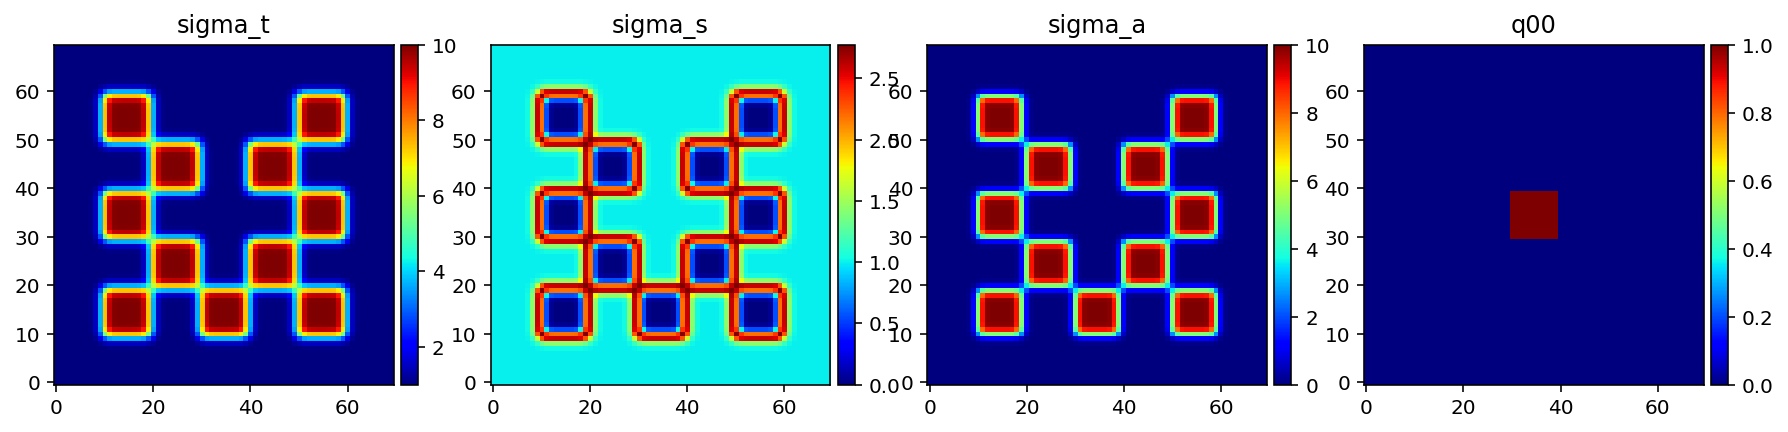

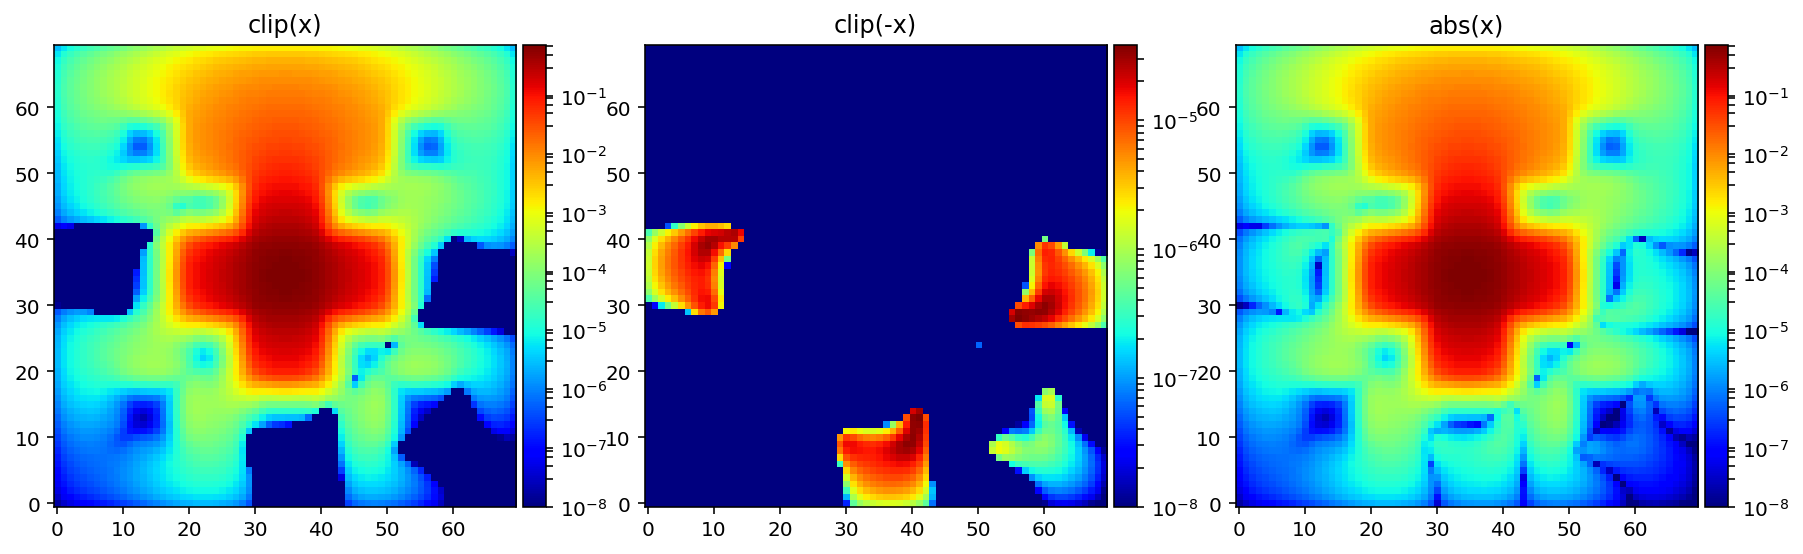

In [86]:
filename = "{}/{}_blur10.0.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_problem( result )
visualize_test( result )
filename = "{}/{}_blur5.0.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_problem( result )
visualize_test( result )
filename = "{}/{}_blur1.0.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_problem( result )
visualize_test( result )

# Collocated u, complex global matrix

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_p1_complex_cg.mat
	order=1  numCoeffs=3  resolution=70 70


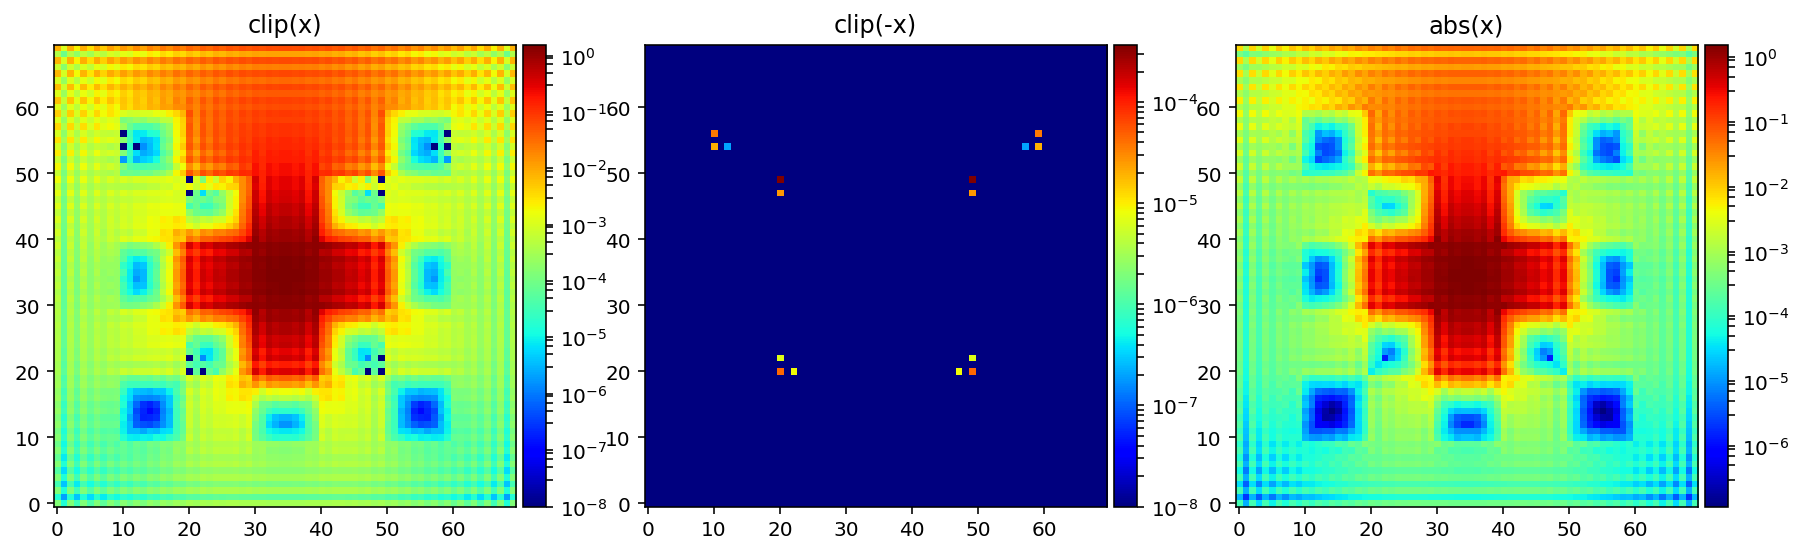

In [12]:
filename = "{}/{}_p1_complex_cg.mat".format(path, problem_id)
visualize_test( filename, False )

# Staggered u, complex global matrix

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_p1_complex_sg.mat
	order=1  numCoeffs=3  resolution=70 70


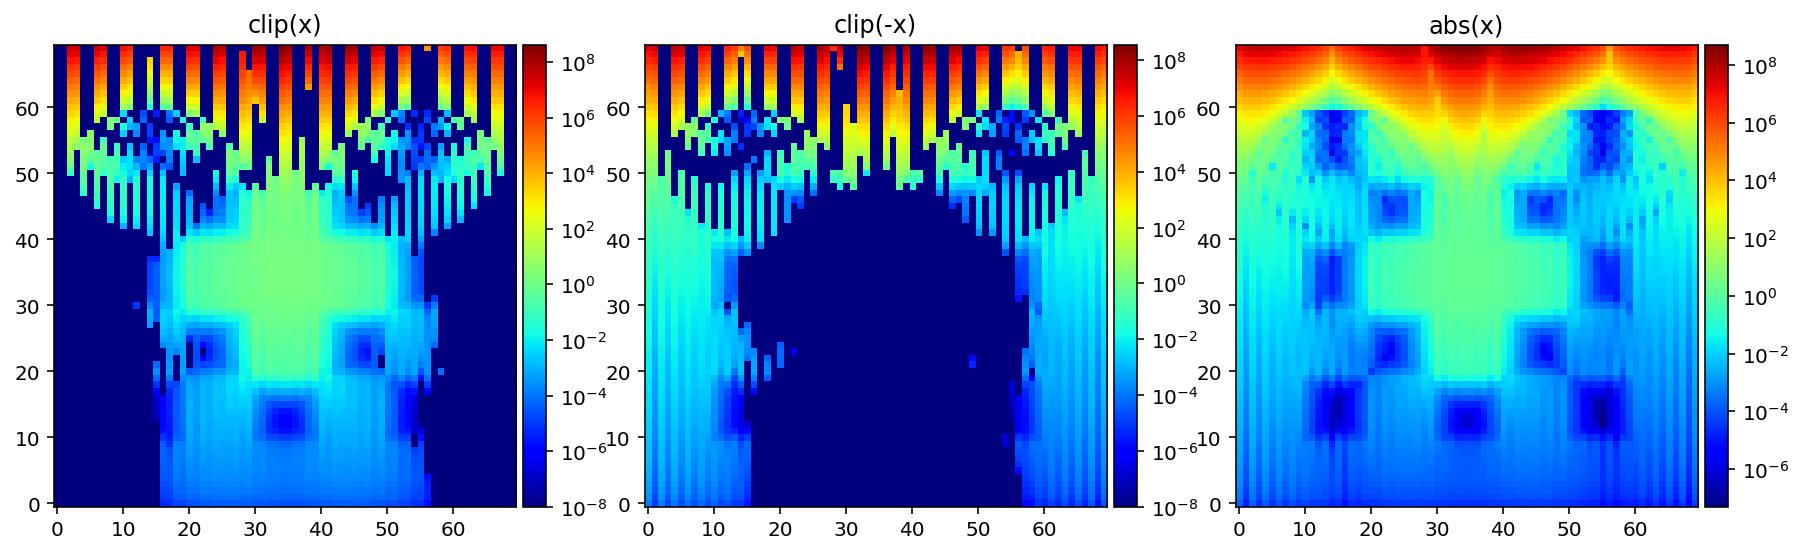

In [13]:
filename = "{}/{}_p1_complex_sg.mat".format(path, problem_id)
visualize_test( filename, False )

# Staggered grid in L-space vs. u-space (first and second order)

loading PN solution from C:/projects/epfl/epfl17/python/notebooks/sopn/x_firstorder_staggered.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sg.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_sg_not13_solution.mat


C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_not13.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_sg_solution.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg.mat
	order=1  numCoeffs=3  resolution=70 70


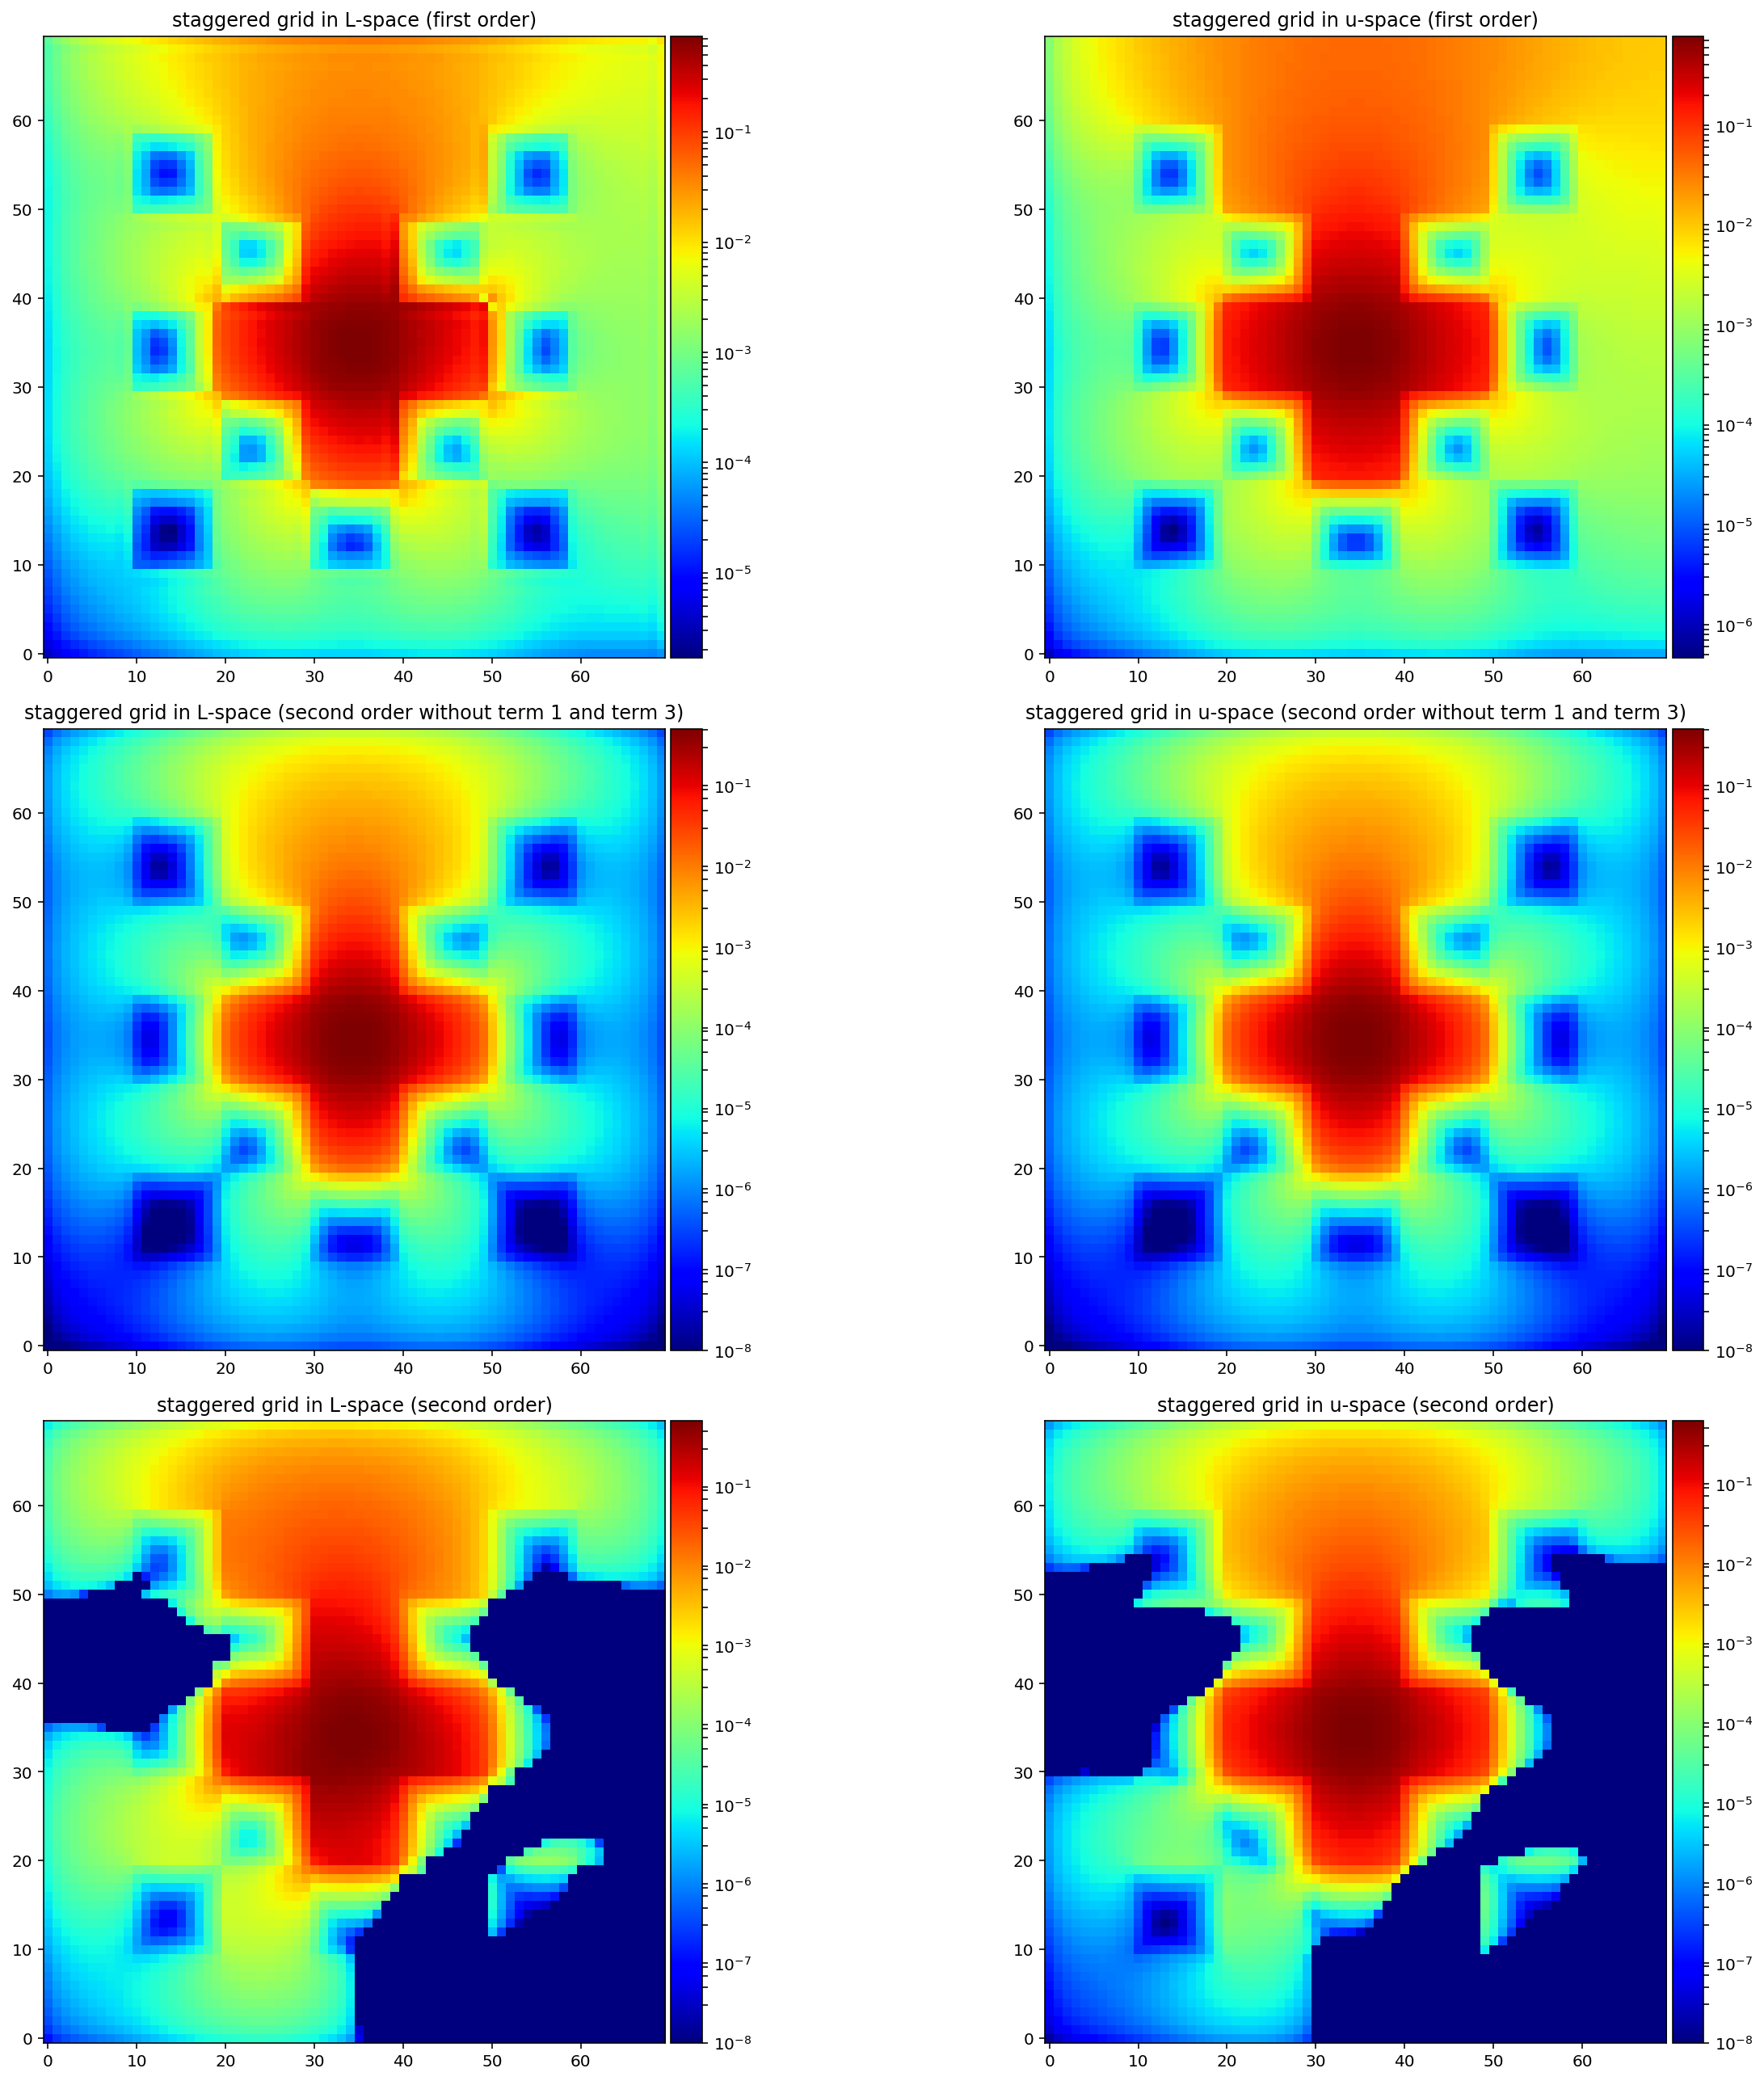

In [90]:

fig = plt.figure(figsize=(18, 18));


filename = "C:/projects/epfl/epfl17/python/notebooks/sopn/x_firstorder_staggered.mat"
pns = load_pn_system( filename )
ax = plt.subplot(321)
plt.title('staggered grid in L-space (first order)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "{}/{}_sg.mat".format(path, problem_id)
pns = load_pn_system( filename )
ax = plt.subplot(322)
plt.title('staggered grid in u-space (first order)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_sg_not13_solution.mat"
pns = load_pn_system( filename )
ax = plt.subplot(323)
plt.title('staggered grid in L-space (second order without term 1 and term 3)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "{}/{}_sopn_sg_not13.mat".format(path, problem_id)
pns = load_pn_system( filename )
ax = plt.subplot(324)
plt.title('staggered grid in u-space (second order without term 1 and term 3)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_sg_solution.mat"
pns = load_pn_system( filename )
ax = plt.subplot(325)
plt.title('staggered grid in L-space (second order)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "{}/{}_sopn_sg.mat".format(path, problem_id)
pns = load_pn_system( filename )
ax = plt.subplot(326)
plt.title('staggered grid in u-space (second order)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

plt.tight_layout()
plt.show()


# Collocated grid in L-space vs. u-space (first and second order)

loading PN solution from C:/projects/epfl/epfl17/python/notebooks/sopn/x_firstorder.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_cg_u.mat
	order=1  numCoeffs=3  resolution=70 70


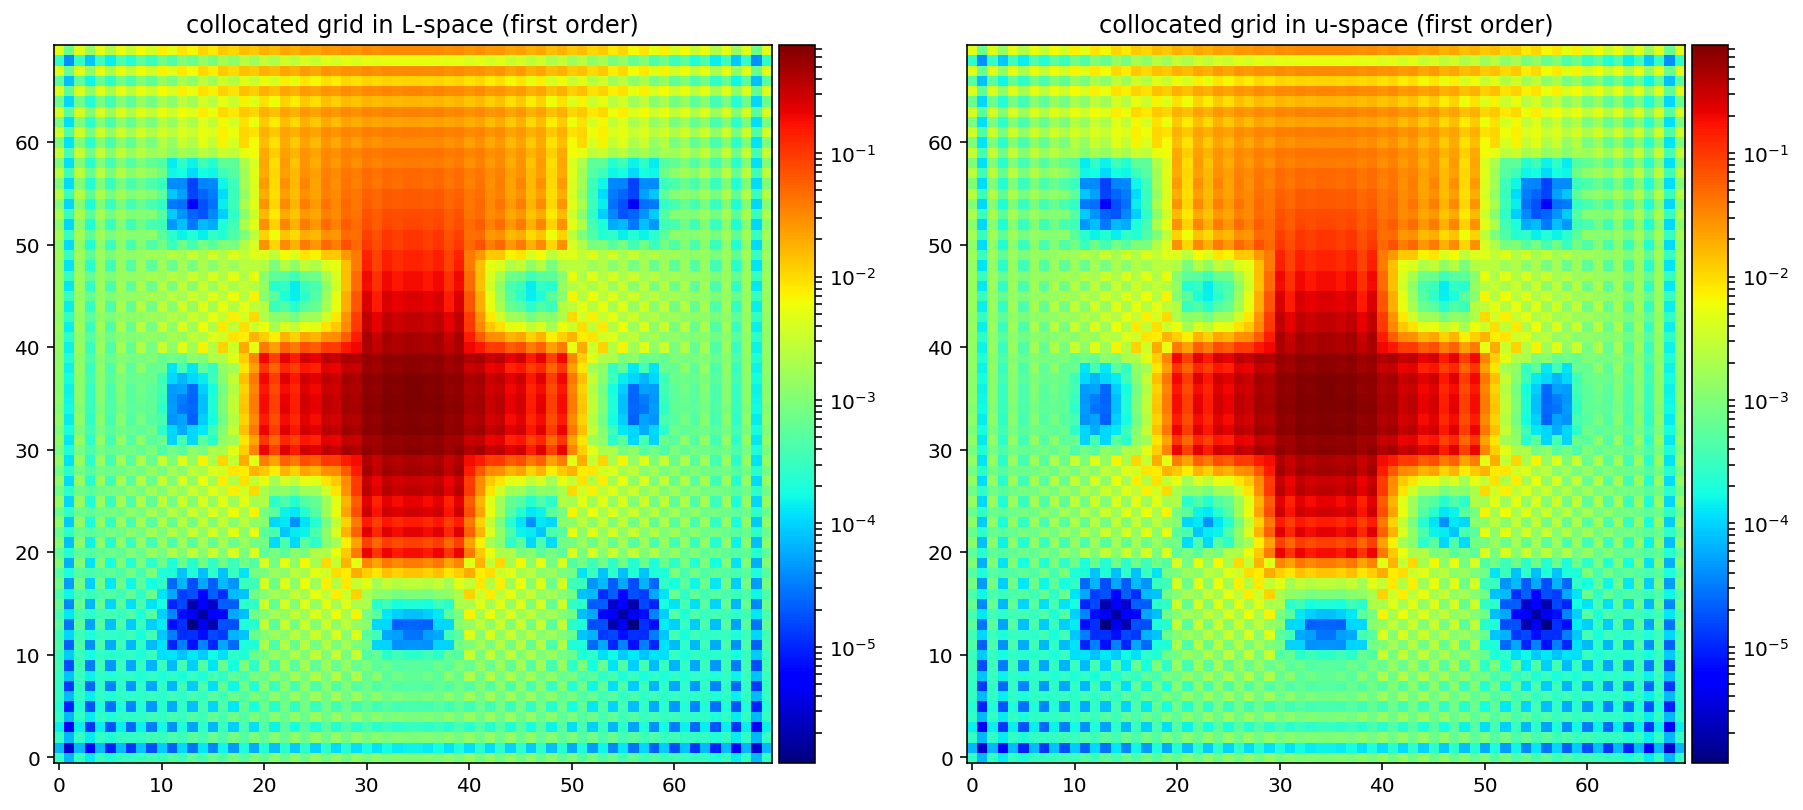

In [15]:

fig = plt.figure(figsize=(15, 15));

filename = "C:/projects/epfl/epfl17/python/notebooks/sopn/x_firstorder.mat"
pns = load_pn_system( filename )
ax = plt.subplot(121)
plt.title('collocated grid in L-space (first order)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "{}/{}_cg_u.mat".format(path, problem_id)
pns = load_pn_system( filename )
ax = plt.subplot(122)
plt.title('collocated grid in u-space (first order)')
img_view = visualize_solution_vector(pns["x"], pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_cg_solution.mat


C:\Users\dk402_000\Anaconda3\lib\site-packages\scipy\io\matlab\mio.py:136: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_cg.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_cg_not13_solution.mat
	order=1  numCoeffs=3  resolution=70 70
loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_cg_not13.mat
	order=1  numCoeffs=3  resolution=70 70


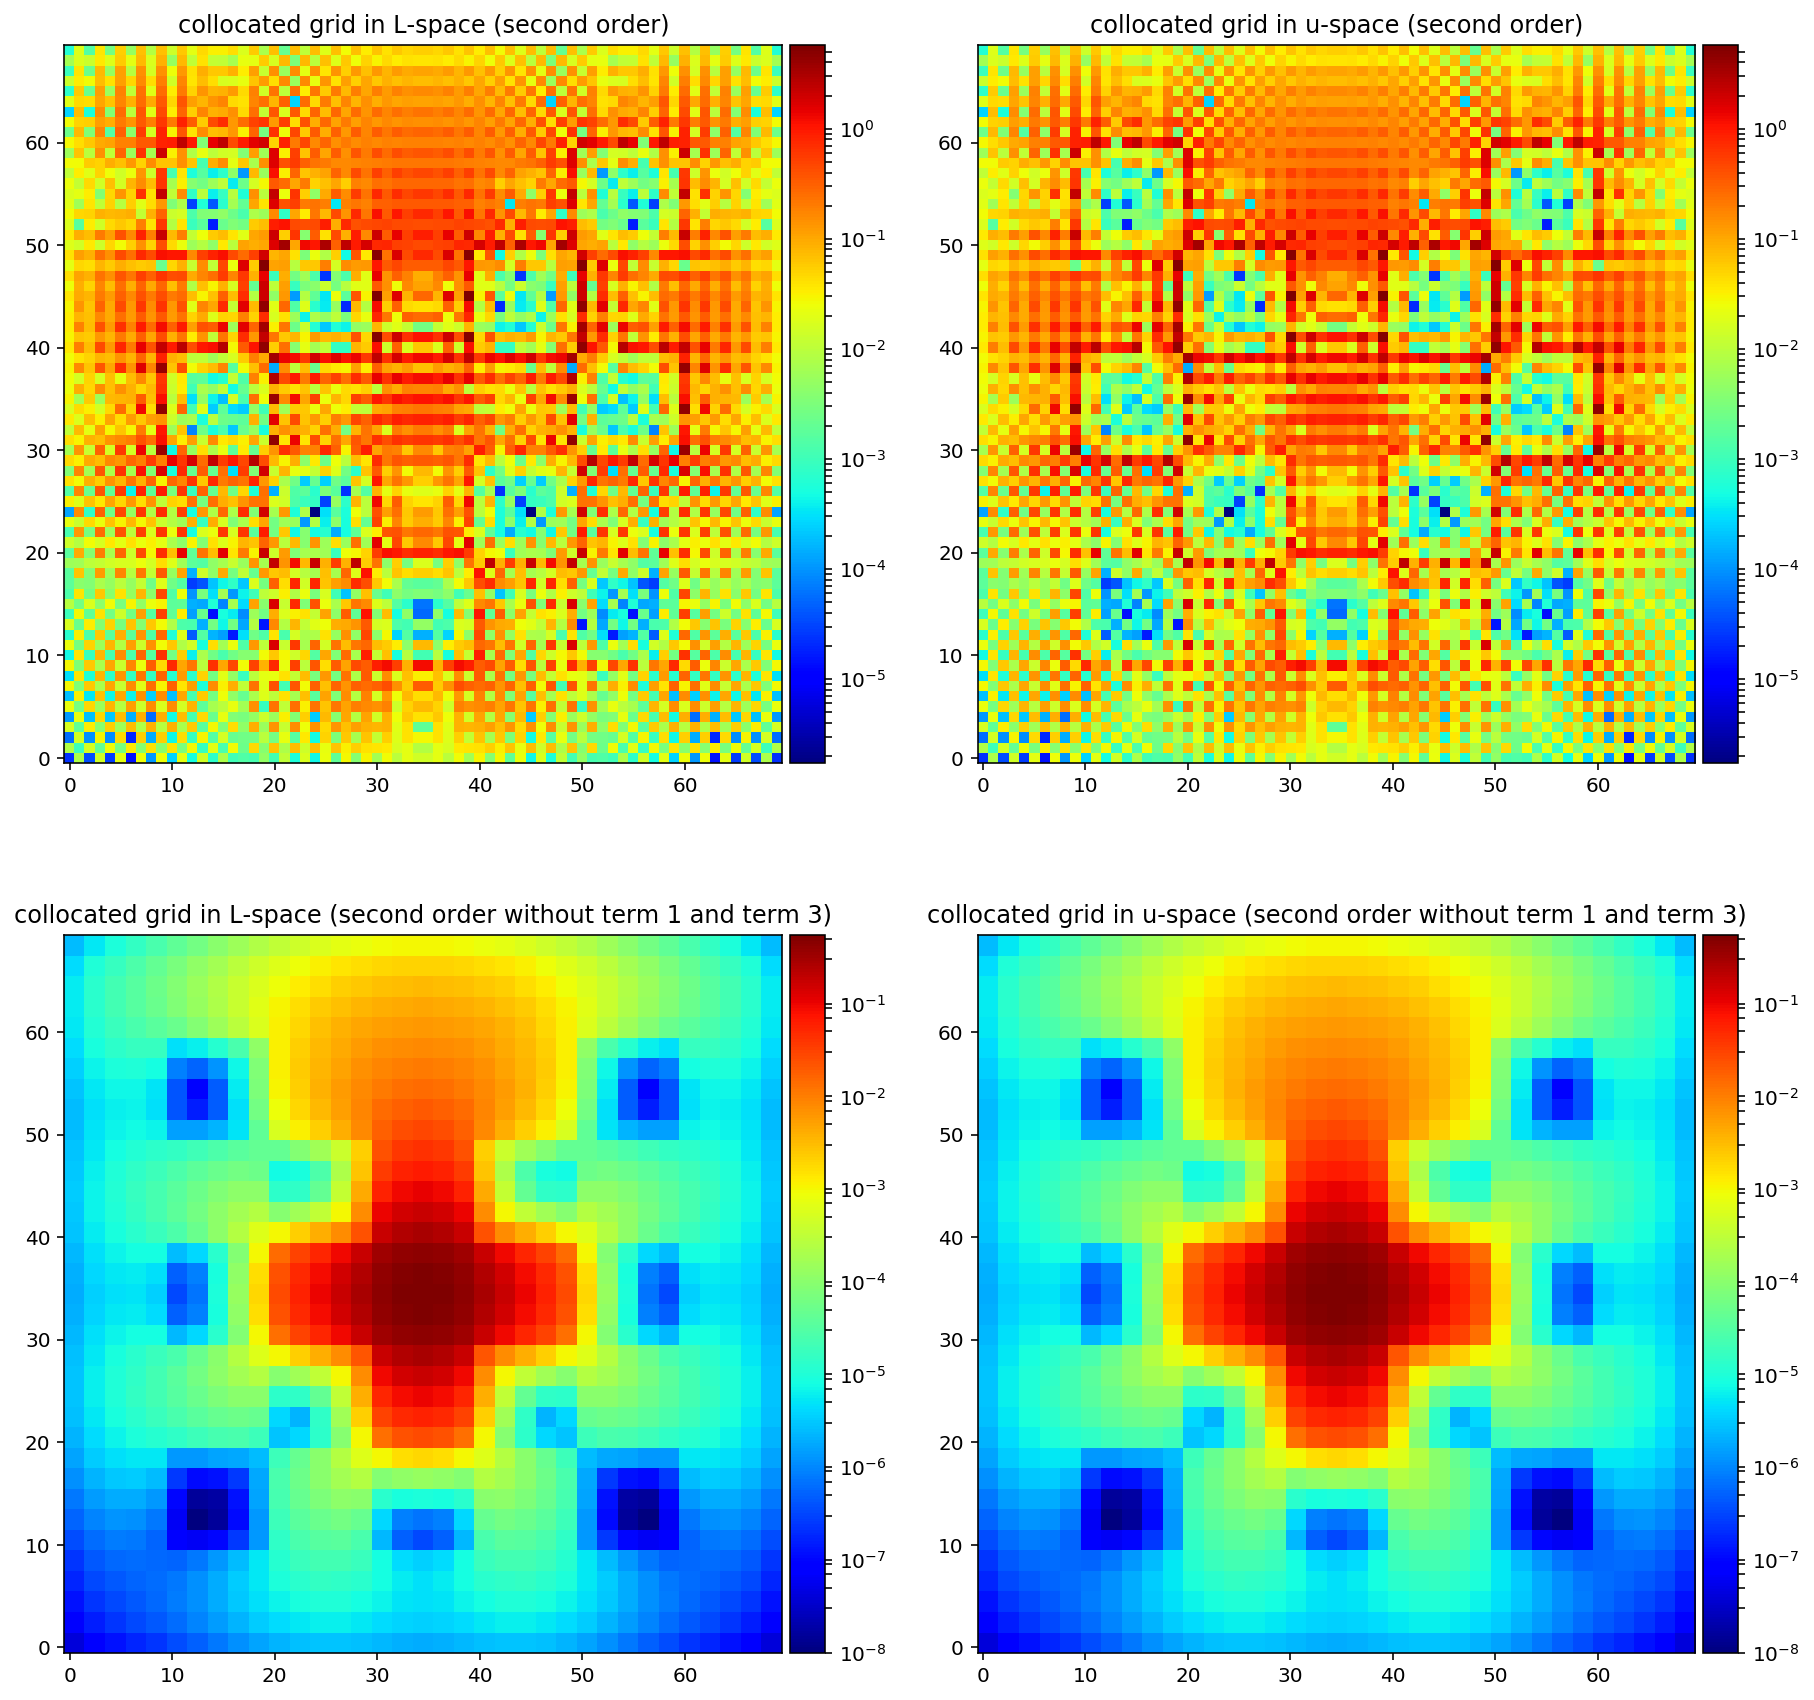

In [17]:
fig = plt.figure(figsize=(15, 15));

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_cg_solution.mat"
pns = load_pn_system( filename )
ax = plt.subplot(221)
plt.title('collocated grid in L-space (second order)')
img_view = visualize_solution_vector(np.abs(pns["x"]), pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_cg.mat"
pns = load_pn_system( filename )
ax = plt.subplot(222)
plt.title('collocated grid in u-space (second order)')
img_view = visualize_solution_vector(np.abs(pns["x"]), pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/terms_original/checkerboard_sopn_cg_not13_solution.mat"
pns = load_pn_system( filename )
ax = plt.subplot(223)
plt.title('collocated grid in L-space (second order without term 1 and term 3)')
img_view = visualize_solution_vector(np.abs(pns["x"]), pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_cg_not13.mat"
pns = load_pn_system( filename )
ax = plt.subplot(224)
plt.title('collocated grid in u-space (second order without term 1 and term 3)')
img_view = visualize_solution_vector(np.abs(pns["x"]), pns["resolution"], pns["numCoeffs"])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(img_view, cax=cax)

-----------------------------

### Higher resolution

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res20.mat
	order=1  numCoeffs=3  resolution=20 20



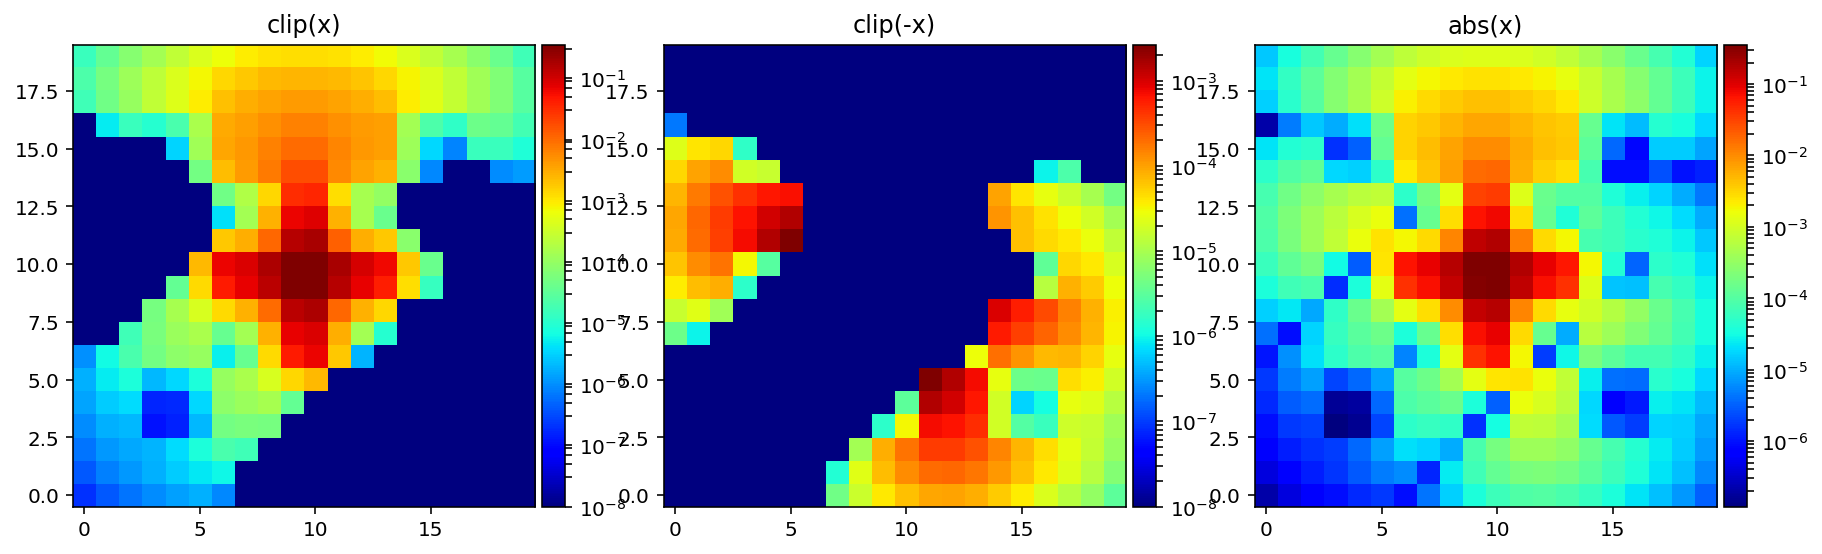

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res70.mat
	order=1  numCoeffs=3  resolution=70 70



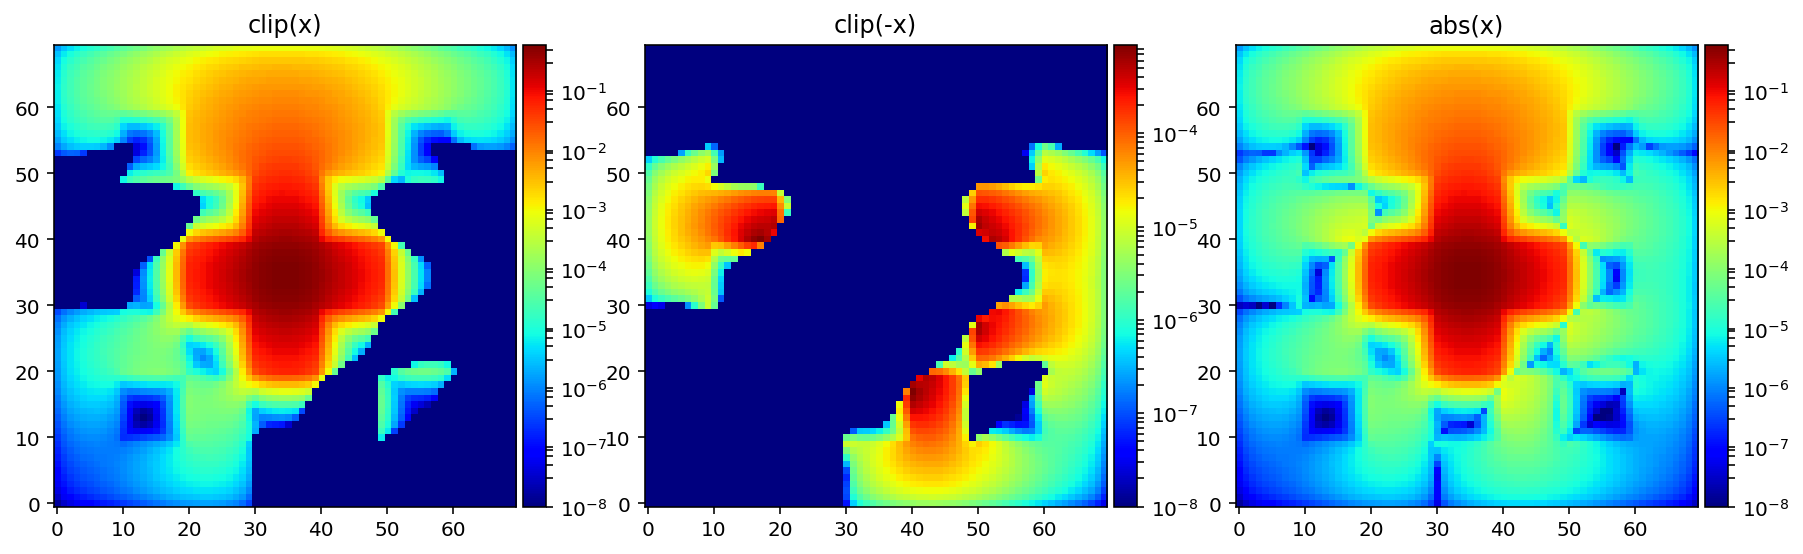

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res100.mat
	order=1  numCoeffs=3  resolution=100 100



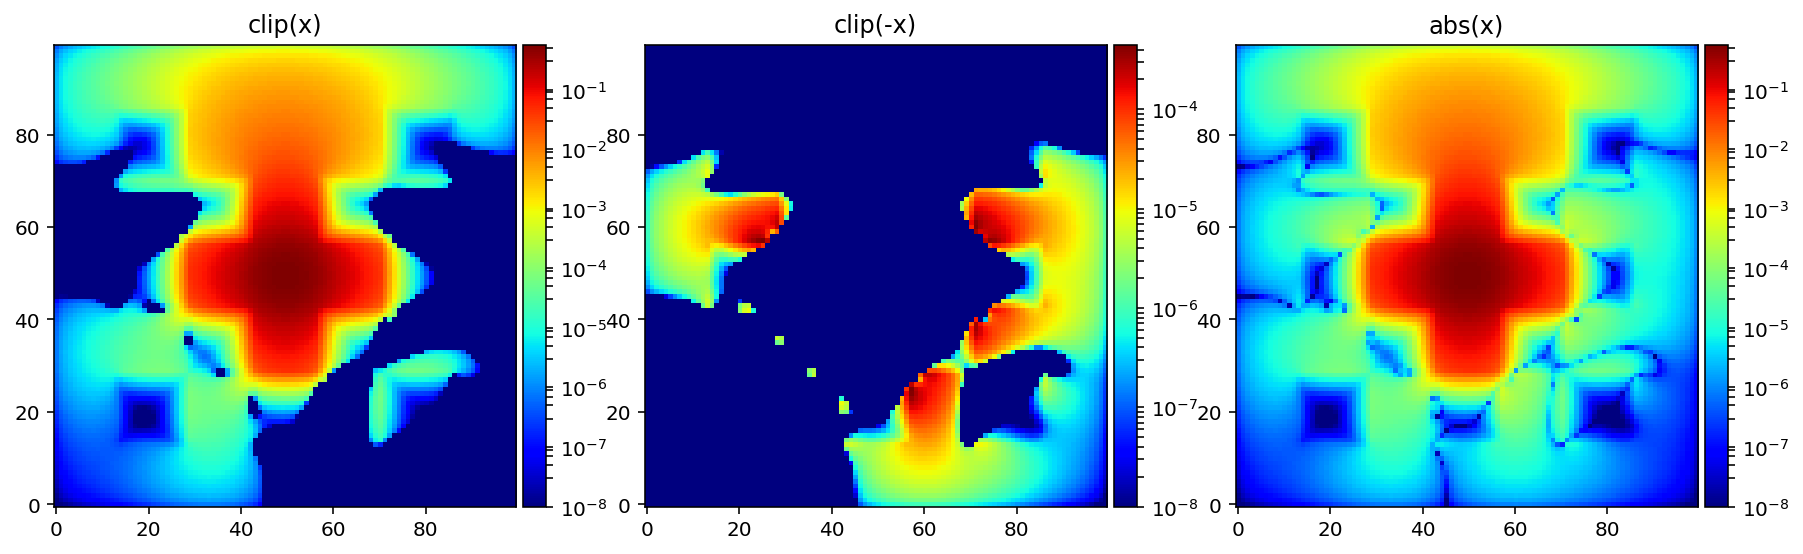

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res150.mat
	order=1  numCoeffs=3  resolution=150 150



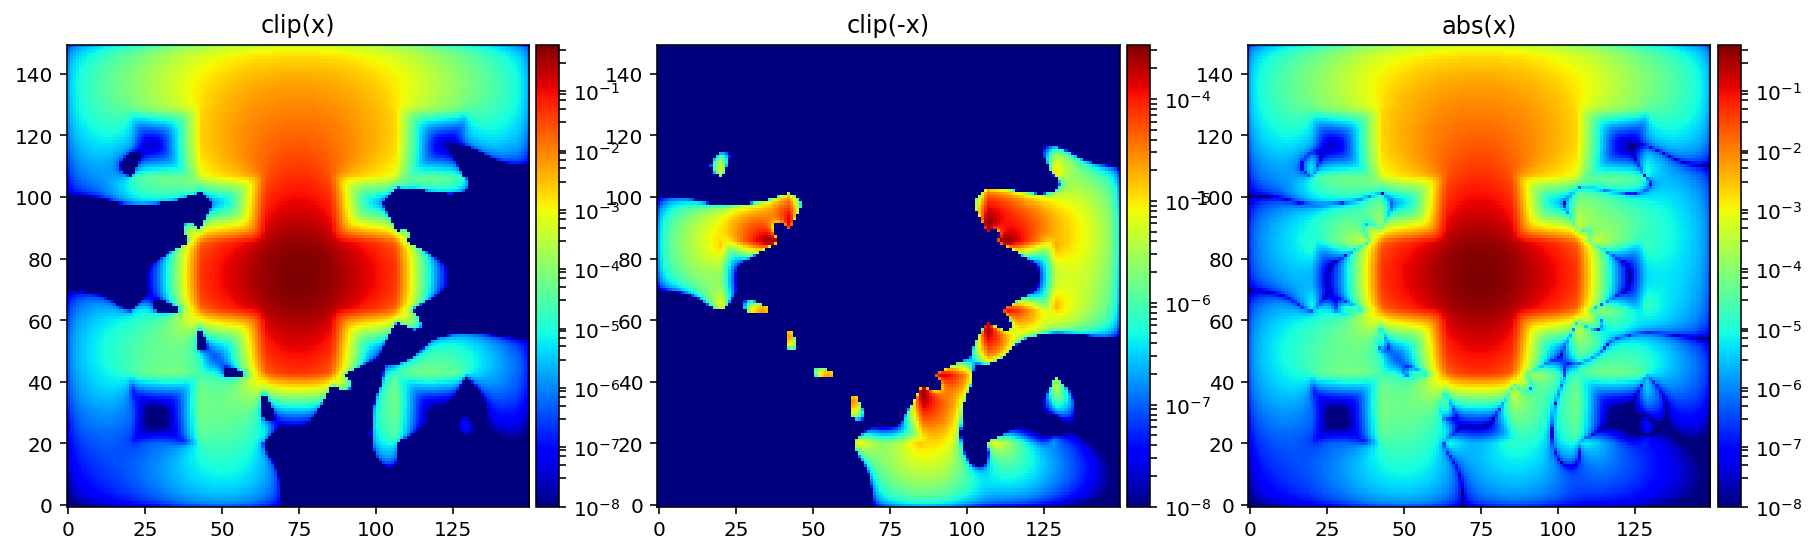

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res200.mat
	order=1  numCoeffs=3  resolution=200 200



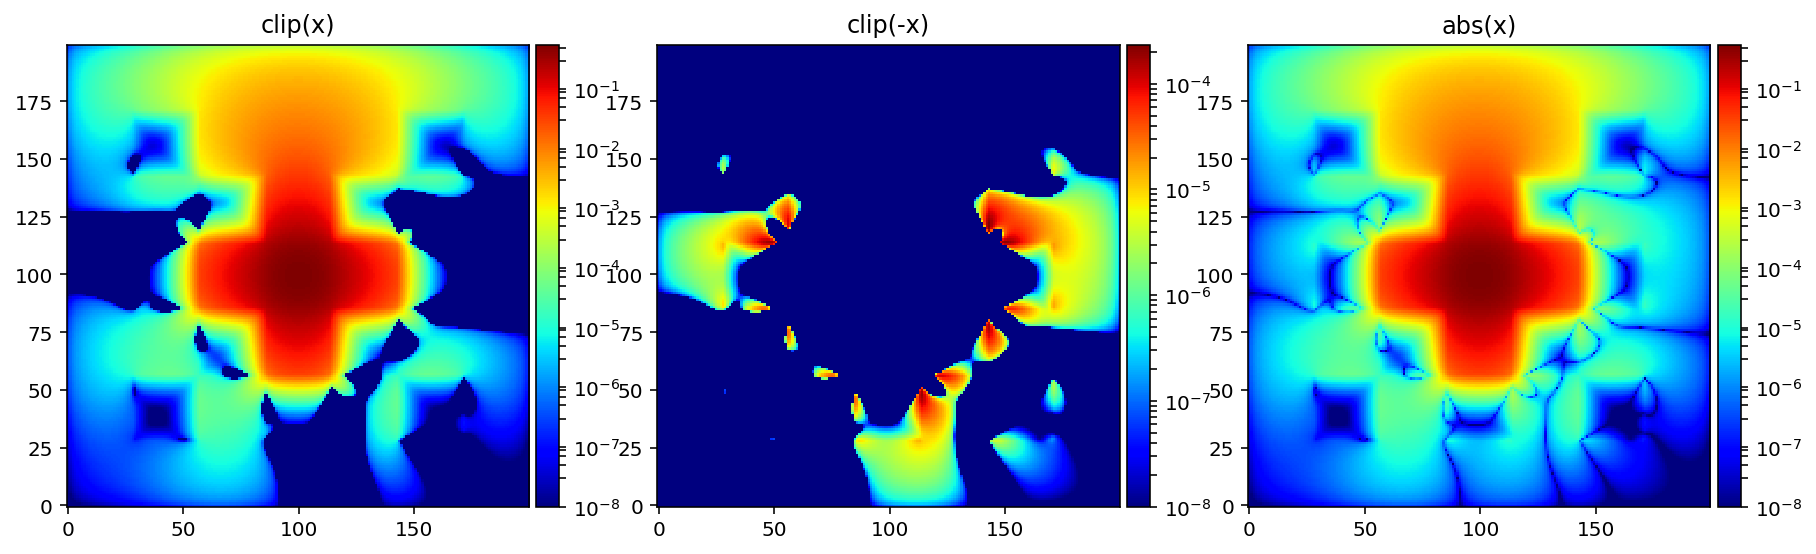

In [110]:
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res20.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res70.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res100.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res150.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_sg_res200.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result )

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_p1.mat
	order=1  numCoeffs=3  resolution=70 70



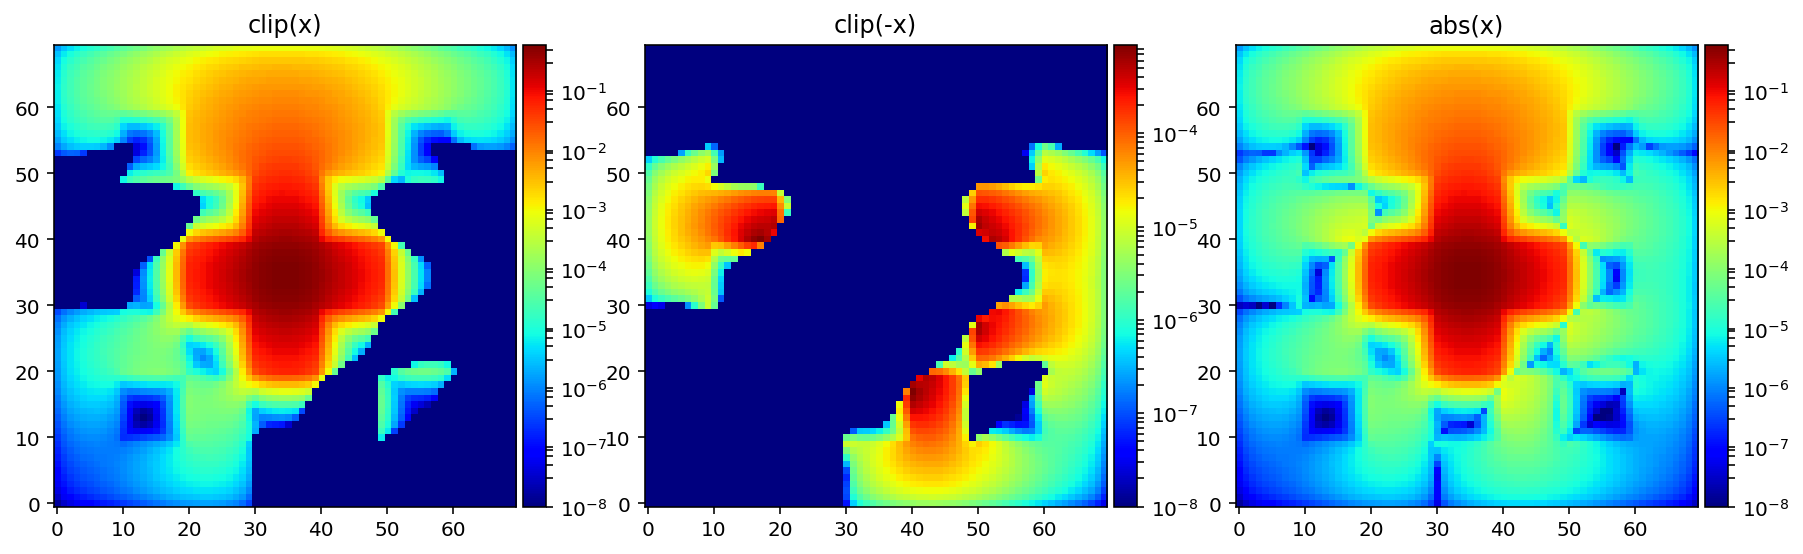

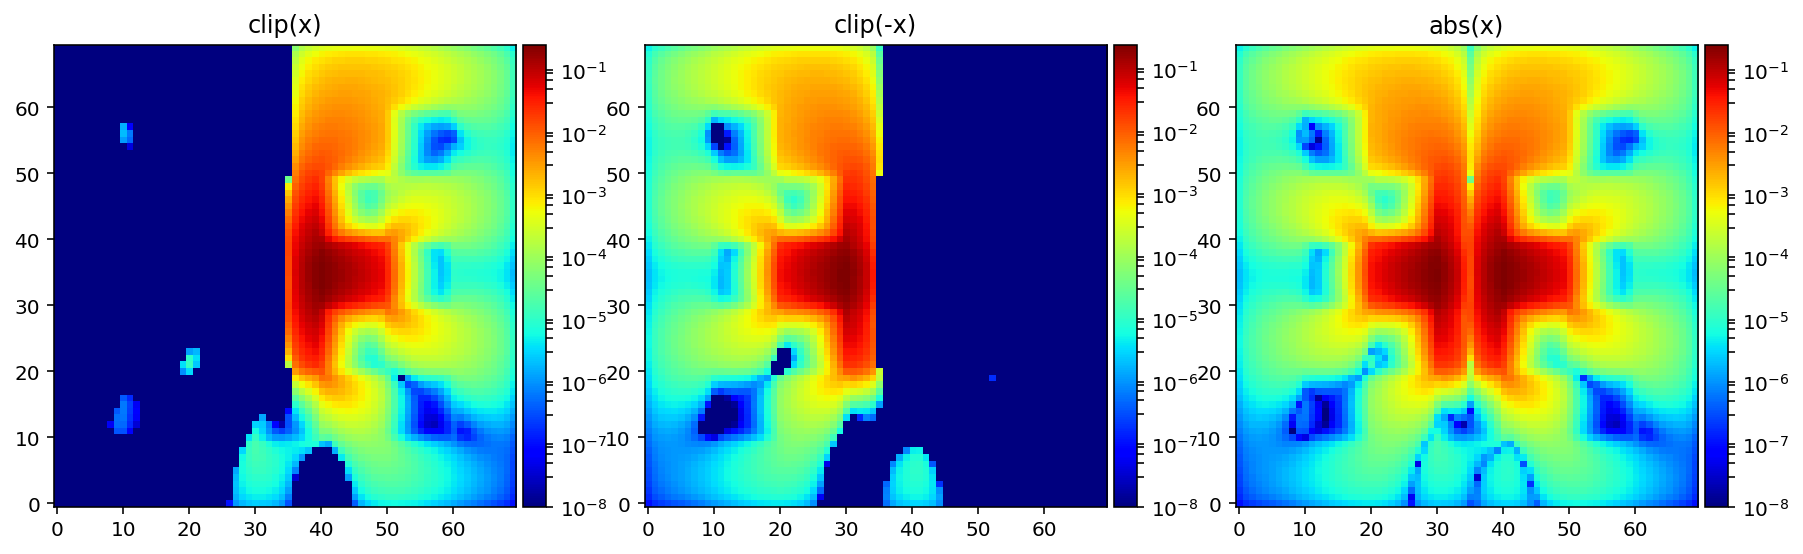

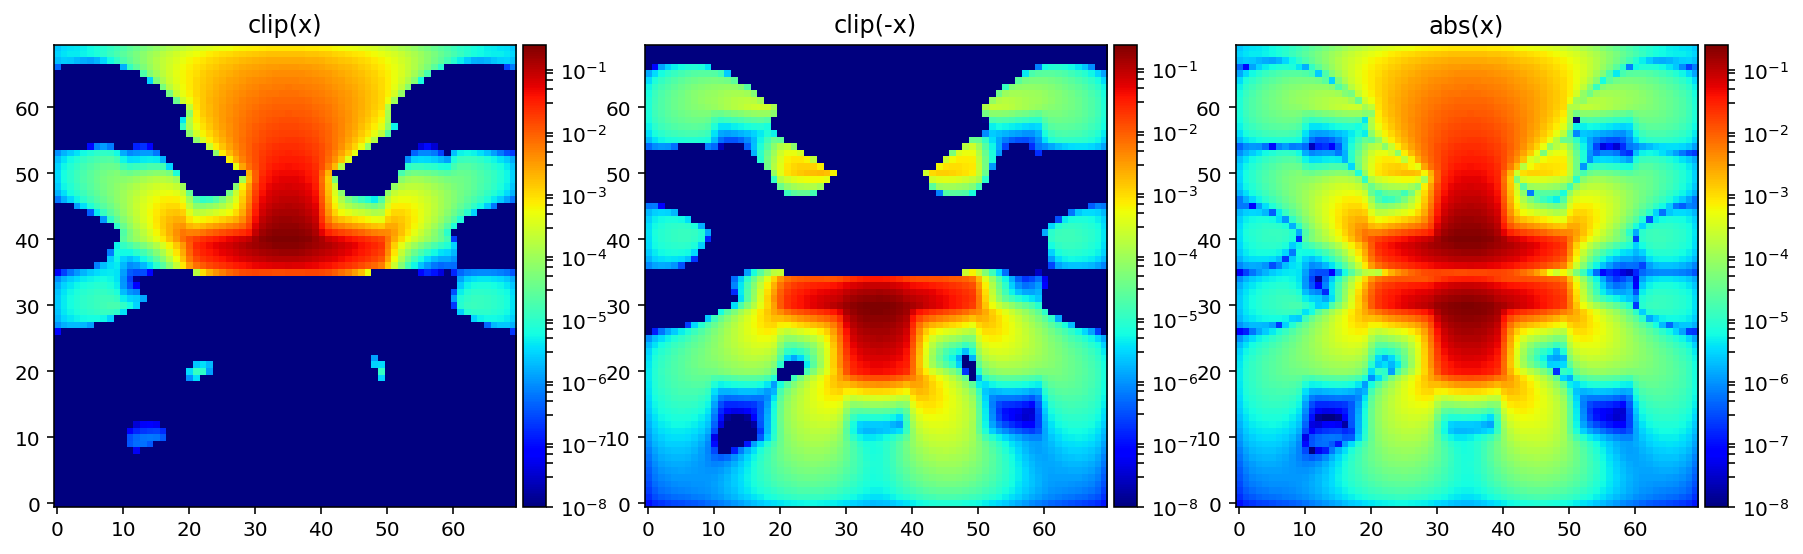

In [123]:
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_p1.mat".format(path, problem_id)
result = load_pn_system(filename)
visualize_test( result, 0 )
visualize_test( result, 1 )
visualize_test( result, 2 )

loading PN solution from C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_p1_not13.mat
	order=1  numCoeffs=3  resolution=70 70



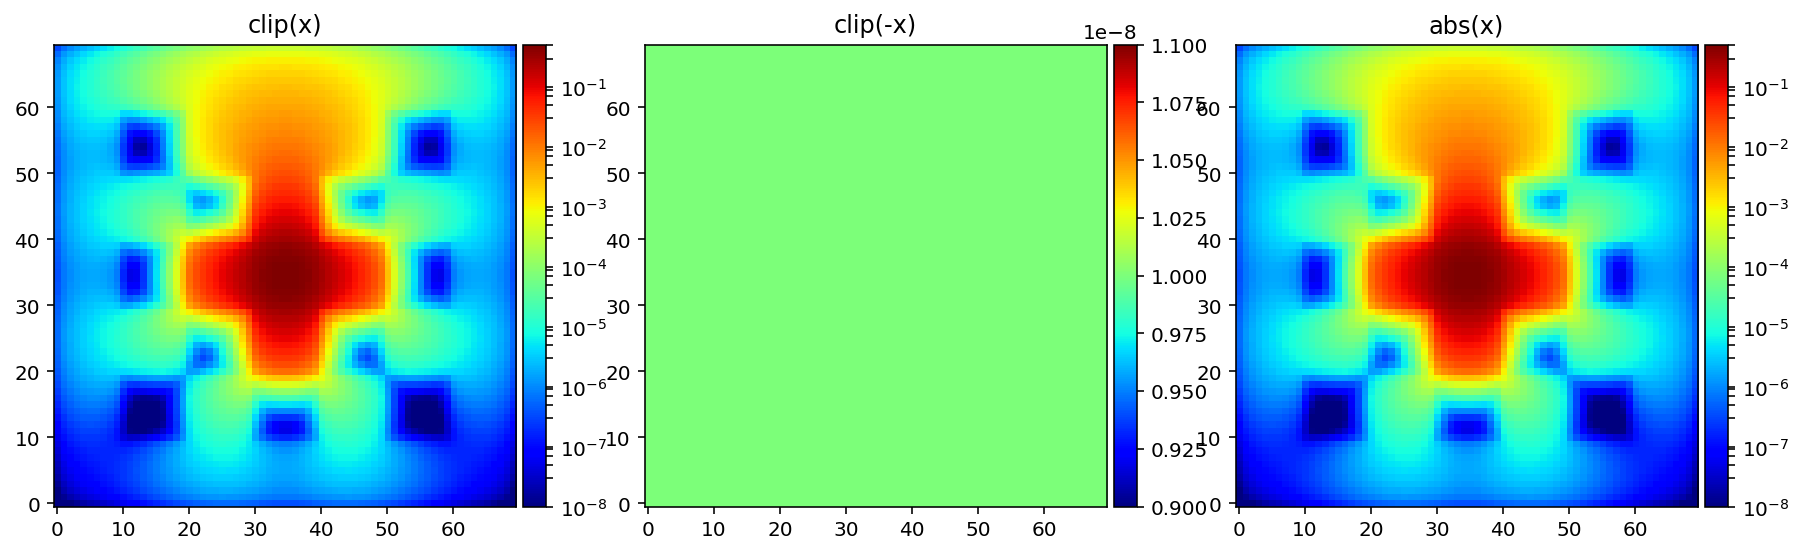

In [124]:
filename = "C:/projects/epfl/epfl17/python/pnsolver/results/studies/checkerboard_sopn_p1_not13.mat"
result = load_pn_system(filename)
visualize_test( result, 0 )